# Exploratory Data Analysis (EDA) of MTA Turnstile Data

In [1]:
# Topic:        Project 1
# Subject:      Exploratory Data Analysis (EDA) of MTA turnstile data
# Date:         11/06/2020
# Name:         yalin yener

In [2]:
# Importing Libraries

import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [3]:
# Reading Multiple txt Files and Creating Data Frame

path = '/Users/yalinyener/GitHub/yalinyener/EDA-MTA-Turnstile/data/Turnstile/2019_01_05' # get path for all files that used by EDA

all_files = glob.glob(path + "/*.txt")

# create empty list and append all files

file_list = []

for filename in all_files:
    df = pd.read_csv(filename)
    file_list.append(df)

# Concatenate all data into one DataFrame that called "mta"
  
mta = pd.concat(file_list)              

In [4]:
#Checking DataFrame's first 10 rows

mta.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,03:00:00,REGULAR,6914752,2344809
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,07:00:00,REGULAR,6914764,2344821
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,11:00:00,REGULAR,6914825,2344898
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,15:00:00,REGULAR,6915047,2344971
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,19:00:00,REGULAR,6915367,2345026
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,23:00:00,REGULAR,6915525,2345049
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/20/2019,03:00:00,REGULAR,6915559,2345064
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/20/2019,07:00:00,REGULAR,6915565,2345072
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/20/2019,11:00:00,REGULAR,6915628,2345125
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/20/2019,15:00:00,REGULAR,6915778,2345178


In [5]:
#Checking DataFrame size

mta.shape

(4480606, 11)

In [6]:
#Checking general info about dataframe

mta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4480606 entries, 0 to 203188
Data columns (total 11 columns):
 #   Column                                                                Dtype 
---  ------                                                                ----- 
 0   C/A                                                                   object
 1   UNIT                                                                  object
 2   SCP                                                                   object
 3   STATION                                                               object
 4   LINENAME                                                              object
 5   DIVISION                                                              object
 6   DATE                                                                  object
 7   TIME                                                                  object
 8   DESC                                                           

In [7]:
# Checking columns names

mta.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [8]:
# Eliminate spaces at columns names

mta.columns = mta.columns.str.strip()
mta.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [9]:
#Checking duplicates rows and drop.

mta.drop_duplicates(subset=None, keep="first", inplace=True)

In [10]:
#Checking null values based on columns

mta.isnull().sum()

C/A         0
UNIT        0
SCP         0
STATION     0
LINENAME    0
DIVISION    0
DATE        0
TIME        0
DESC        0
ENTRIES     0
EXITS       0
dtype: int64

In [11]:
#Checking basic descriptive statistics for numerical columns.

mta.describe()

,ENTRIES,EXITS
count,4.480606e+06,4.480606e+06
mean,4.088585e+07,3.365294e+07
std,2.097226e+08,1.941850e+08
min,0.000000e+00,0.000000e+00
25%,3.937772e+05,1.663580e+05
50%,2.296828e+06,1.318136e+06
75%,6.822866e+06,4.712473e+06
max,2.129552e+09,2.124342e+09


In [12]:
# Adding "TURNSTILE" columns that concatenate 'C/A', 'UNIT', 'SCP'

mta["TURNSTILE"] = mta["C/A"]+"-"+mta["UNIT"]+"-"+mta["SCP"]

mta.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,03:00:00,REGULAR,6914752,2344809,A002-R051-02-00-00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,07:00:00,REGULAR,6914764,2344821,A002-R051-02-00-00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,11:00:00,REGULAR,6914825,2344898,A002-R051-02-00-00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,15:00:00,REGULAR,6915047,2344971,A002-R051-02-00-00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,19:00:00,REGULAR,6915367,2345026,A002-R051-02-00-00
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,23:00:00,REGULAR,6915525,2345049,A002-R051-02-00-00
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/20/2019,03:00:00,REGULAR,6915559,2345064,A002-R051-02-00-00
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/20/2019,07:00:00,REGULAR,6915565,2345072,A002-R051-02-00-00
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/20/2019,11:00:00,REGULAR,6915628,2345125,A002-R051-02-00-00
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/20/2019,15:00:00,REGULAR,6915778,2345178,A002-R051-02-00-00


In [13]:
# Creating DATETIME as datetime64 column that concatenate "DATE" and "TIME"

mta['DATETIME'] = mta["DATE"]+ " " + mta["TIME"]

mta['DATETIME'] = pd.to_datetime(mta['DATETIME'], format='%m/%d/%Y %H:%M:%S')

mta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4480606 entries, 0 to 203188
Data columns (total 13 columns):
 #   Column     Dtype         
---  ------     -----         
 0   C/A        object        
 1   UNIT       object        
 2   SCP        object        
 3   STATION    object        
 4   LINENAME   object        
 5   DIVISION   object        
 6   DATE       object        
 7   TIME       object        
 8   DESC       object        
 9   ENTRIES    int64         
 10  EXITS      int64         
 11  TURNSTILE  object        
 12  DATETIME   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(10)
memory usage: 478.6+ MB


In [14]:
mta.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,03:00:00,REGULAR,6914752,2344809,A002-R051-02-00-00,2019-01-19 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,07:00:00,REGULAR,6914764,2344821,A002-R051-02-00-00,2019-01-19 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,11:00:00,REGULAR,6914825,2344898,A002-R051-02-00-00,2019-01-19 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,15:00:00,REGULAR,6915047,2344971,A002-R051-02-00-00,2019-01-19 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,19:00:00,REGULAR,6915367,2345026,A002-R051-02-00-00,2019-01-19 19:00:00


In [15]:
#Create a column that called "NAMEOFDAY"
mta["NAMEOFDAY"]= mta["DATETIME"].dt.day_name()

#Checking sample 5 rows
mta.sample(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE,DATETIME,NAMEOFDAY
76226,N303,R015,00-00-06,5 AV/53 ST,EM,IND,05/28/2019,14:00:00,REGULAR,2883003,1127664,N303-R015-00-00-06,2019-05-28 14:00:00,Tuesday
113921,N702A,R572,01-00-03,96 ST-2 AVE,Q,IND,05/24/2019,09:10:00,REGULAR,395207,315040,N702A-R572-01-00-03,2019-05-24 09:10:00,Friday
93697,N500,R020,00-03-01,47-50 STS ROCK,BDFM,IND,04/02/2019,16:00:00,REGULAR,6791207,3499339,N500-R020-00-03-01,2019-04-02 16:00:00,Tuesday
15747,B018,R184,00-00-02,CORTELYOU RD,BQ,BMT,05/17/2019,04:00:00,REGULAR,6099358,2720505,B018-R184-00-00-02,2019-05-17 04:00:00,Friday
60583,N102,R127,01-06-02,JAY ST-METROTEC,ACF,IND,01/19/2019,03:00:00,REGULAR,6391383,120290,N102-R127-01-06-02,2019-01-19 03:00:00,Saturday


In [16]:
# Working with only neccessary columns

mta = mta[["STATION","TURNSTILE","DATE","TIME","DATETIME","NAMEOFDAY","ENTRIES","EXITS"]]
mta.head(10)

,STATION,TURNSTILE,DATE,TIME,DATETIME,NAMEOFDAY,ENTRIES,EXITS
0,59 ST,A002-R051-02-00-00,01/19/2019,03:00:00,2019-01-19 03:00:00,Saturday,6914752,2344809
1,59 ST,A002-R051-02-00-00,01/19/2019,07:00:00,2019-01-19 07:00:00,Saturday,6914764,2344821
2,59 ST,A002-R051-02-00-00,01/19/2019,11:00:00,2019-01-19 11:00:00,Saturday,6914825,2344898
3,59 ST,A002-R051-02-00-00,01/19/2019,15:00:00,2019-01-19 15:00:00,Saturday,6915047,2344971
4,59 ST,A002-R051-02-00-00,01/19/2019,19:00:00,2019-01-19 19:00:00,Saturday,6915367,2345026
5,59 ST,A002-R051-02-00-00,01/19/2019,23:00:00,2019-01-19 23:00:00,Saturday,6915525,2345049
6,59 ST,A002-R051-02-00-00,01/20/2019,03:00:00,2019-01-20 03:00:00,Sunday,6915559,2345064
7,59 ST,A002-R051-02-00-00,01/20/2019,07:00:00,2019-01-20 07:00:00,Sunday,6915565,2345072
8,59 ST,A002-R051-02-00-00,01/20/2019,11:00:00,2019-01-20 11:00:00,Sunday,6915628,2345125
9,59 ST,A002-R051-02-00-00,01/20/2019,15:00:00,2019-01-20 15:00:00,Sunday,6915778,2345178


In [17]:
#Finding maximum and minimum date in dataframe

print("Maximum date: ")
print(mta["DATETIME"].max())
print()
print("Minimum date: ")
print(mta["DATETIME"].min())

Maximum date: 
2019-05-31 23:59:57

Minimum date: 
2018-12-29 00:00:00


In [18]:
#Working with these dates beetween 01.01.2019 and 31.05.2019

mta = mta[mta["DATETIME"]>="2019"]
mta.shape

(4394408, 8)

In [19]:
#Controlling maximum and minimum date in dataframe

print("Maximum date: ")
print(mta["DATETIME"].max())
print()
print("Minimum date: ")
print(mta["DATETIME"].min())

Maximum date: 
2019-05-31 23:59:57

Minimum date: 
2019-01-01 00:00:00


In [20]:
#Checking Unique Station count

len(mta["STATION"].unique())

379

In [21]:
#Checking Unique TURNSTILE count

len(mta["TURNSTILE"].unique())

4932

In [22]:
#Checking some columns value's counts

print("Row count based on stations (First 10 rows)")
print(mta["STATION"].value_counts().sort_values(ascending=False).head(10))

Row count based on stations (First 10 rows)
34 ST-PENN STA     91854
FULTON ST          87452
23 ST              65838
GRD CNTRL-42 ST    60944
86 ST              54543
CANAL ST           52935
34 ST-HERALD SQ    50303
CHAMBERS ST        49637
59 ST              47996
42 ST-PORT AUTH    47040
Name: STATION, dtype: int64


In [84]:
#Understanding data-1 (filtering one turnstile for only a month)
#This subset data (data-1) perform a good example 

mta_1 = mta[(mta["TURNSTILE"]=="A002-R051-02-00-00")&(mta["DATE"]>="03/01/2019")&(mta["DATE"]<="04/01/2019")]
mta_1

,STATION,TURNSTILE,DATE,TIME,DATETIME,NAMEOFDAY,ENTRIES,EXITS
0,59 ST,A002-R051-02-00-00,03/23/2019,00:00:00,2019-03-23 00:00:00,Saturday,6989774,2370411
1,59 ST,A002-R051-02-00-00,03/23/2019,04:00:00,2019-03-23 04:00:00,Saturday,6989795,2370413
2,59 ST,A002-R051-02-00-00,03/23/2019,08:00:00,2019-03-23 08:00:00,Saturday,6989813,2370436
3,59 ST,A002-R051-02-00-00,03/23/2019,12:00:00,2019-03-23 12:00:00,Saturday,6989924,2370512
4,59 ST,A002-R051-02-00-00,03/23/2019,16:00:00,2019-03-23 16:00:00,Saturday,6990200,2370573
...,...,...,...,...,...,...,...,...
37,59 ST,A002-R051-02-00-00,03/01/2019,07:00:00,2019-03-01 07:00:00,Friday,6962111,2361714
38,59 ST,A002-R051-02-00-00,03/01/2019,11:00:00,2019-03-01 11:00:00,Friday,6962243,2362017
39,59 ST,A002-R051-02-00-00,03/01/2019,15:00:00,2019-03-01 15:00:00,Friday,6962502,2362082
40,59 ST,A002-R051-02-00-00,03/01/2019,19:00:00,2019-03-01 19:00:00,Friday,6963303,2362149


In [24]:
#Understanding data-1 with basic statistics values

mta_1.describe()

,ENTRIES,EXITS
count,1.970000e+02,1.970000e+02
mean,6.981504e+06,2.367944e+06
std,1.170877e+04,3.713283e+03
min,6.962094e+06,2.361672e+06
25%,6.972010e+06,2.365118e+06
50%,6.981415e+06,2.367704e+06
75%,6.991446e+06,2.370866e+06
max,7.001895e+06,2.374553e+06


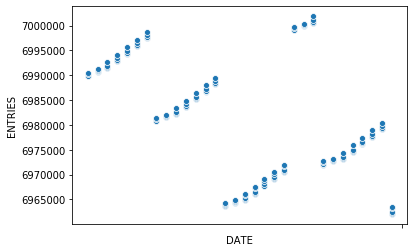

In [25]:
#Understanding data-1 with scatterplot

ax = sns.scatterplot(x="DATE", y="ENTRIES", data=mta_1)
plt.xticks("")
plt.show()

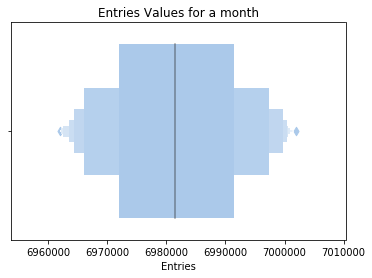

In [26]:
#Understanding data-1 with boxenplot

ax = sns.boxenplot(x='ENTRIES', data=mta_1,palette="pastel").set(xlabel='Entries',title="Entries Values for a month")


In [85]:
#Understanding data-2
#This subset data (data-1) perform a bad example (huge jump)

mta_2 = mta[(mta["TURNSTILE"]=="R252-R180-00-03-02")&(mta["DATE"]>="03/01/2019")&(mta["DATE"]<="04/01/2019")]
mta_2

,STATION,TURNSTILE,DATE,TIME,DATETIME,NAMEOFDAY,ENTRIES,EXITS
164686,103 ST,R252-R180-00-03-02,03/23/2019,01:00:00,2019-03-23 01:00:00,Saturday,2097086759,1711189207
164687,103 ST,R252-R180-00-03-02,03/23/2019,05:00:00,2019-03-23 05:00:00,Saturday,2097086746,1711189119
164688,103 ST,R252-R180-00-03-02,03/23/2019,09:00:00,2019-03-23 09:00:00,Saturday,2097086648,1711188991
164689,103 ST,R252-R180-00-03-02,03/23/2019,13:00:00,2019-03-23 13:00:00,Saturday,2097086393,1711188734
164690,103 ST,R252-R180-00-03-02,03/23/2019,17:00:00,2019-03-23 17:00:00,Saturday,2097086117,1711188326
...,...,...,...,...,...,...,...,...
163829,103 ST,R252-R180-00-03-02,03/01/2019,04:00:00,2019-03-01 04:00:00,Friday,8560879,26864157
163830,103 ST,R252-R180-00-03-02,03/01/2019,08:00:00,2019-03-01 08:00:00,Friday,8561105,26864399
163831,103 ST,R252-R180-00-03-02,03/01/2019,12:00:00,2019-03-01 12:00:00,Friday,8561558,26864833
163832,103 ST,R252-R180-00-03-02,03/01/2019,16:00:00,2019-03-01 16:00:00,Friday,8562057,26865365


In [83]:
#Understanding data-2 with basic statistics values

mta_2.describe()

,ENTRIES,EXITS
count,1.970000e+02,1.970000e+02
mean,7.294800e+08,6.082669e+08
std,9.954612e+08,8.027978e+08
min,8.560857e+06,2.686409e+07
25%,8.572374e+06,2.688148e+07
50%,8.580069e+06,2.689884e+07
75%,2.097077e+09,1.711174e+09
max,2.097089e+09,1.711193e+09


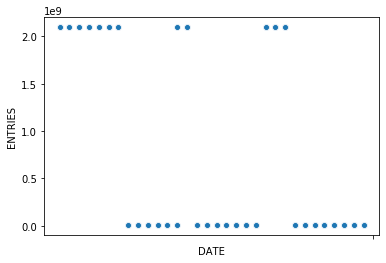

In [29]:
#Understanding data-2 with scatterplot

ax = sns.scatterplot(x="DATE", y="ENTRIES", data=mta_2)
plt.xticks("")
plt.show()

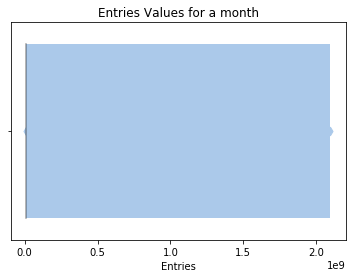

In [30]:
#Understanding data-2 with boxenplot

ax = sns.boxenplot(x='ENTRIES', data=mta_2,palette="pastel").set(xlabel='Entries',title="Entries Values for a month")

In [87]:
#Finding Daily traffic(entries+exits) based on turnstile

mta_entries = mta.groupby(["STATION","TURNSTILE","DATE","NAMEOFDAY"]).ENTRIES.max() - mta.groupby(["STATION","TURNSTILE","DATE","NAMEOFDAY"]).ENTRIES.min()

mta_exits = mta.groupby(["STATION","TURNSTILE","DATE","NAMEOFDAY"]).EXITS.max() - mta.groupby(["STATION","TURNSTILE","DATE","NAMEOFDAY"]).EXITS.min()

mta_entries = mta_entries.reset_index()

mta_exits = mta_exits.reset_index()

mta_entries_exits = pd.merge(mta_entries, mta_exits, how="outer")

mta_entries_exits["TRAFFIC"] = mta_entries_exits["ENTRIES"] + mta_entries_exits["EXITS"]

mta_entries_exits.sample(10)

,STATION,TURNSTILE,DATE,NAMEOFDAY,ENTRIES,EXITS,TRAFFIC
605583,NEWKIRK PLAZA,B019-R149-00-00-04,01/30/2019,Wednesday,2475,1072,3547
508100,HUNTS POINT AV,R412-R146-00-03-02,03/20/2019,Wednesday,1323,815,2138
263576,90 ST-ELMHURST,R527-R122-00-03-00,05/17/2019,Friday,1649,1087,2736
298799,B'WAY-LAFAYETTE,N519-R461-00-03-02,02/20/2019,Wednesday,1670,767,2437
159689,46 ST,N317-R267-02-06-01,02/28/2019,Thursday,5,26,31
365672,CHAMBERS ST,N091-R029-02-00-02,01/07/2019,Monday,890,716,1606
526849,JFK JAMAICA CT1,JFK03-R536-00-03-02,04/19/2019,Friday,1327,582,1909
53871,163 ST-AMSTERDM,N016A-R296-00-00-01,03/10/2019,Sunday,209,119,328
25836,138/GRAND CONC,R259-R307-00-00-00,04/08/2019,Monday,1346,1275,2621
29365,14 ST,N512-R163-00-00-01,01/04/2019,Friday,793,1772,2565


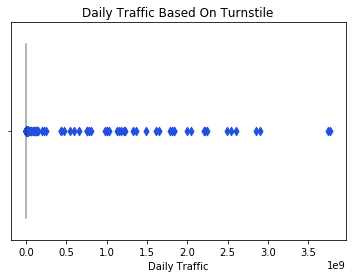

In [32]:
#Boxenplot for daily traffic

ax = sns.boxenplot(x='TRAFFIC', data=mta_entries_exits,palette="bright").set(xlabel='Daily Traffic',title="Daily Traffic Based On Turnstile")

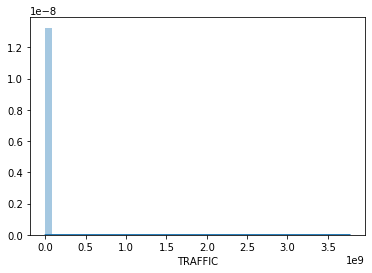

In [33]:
# Distplot for daily traffic

ax = sns.distplot(mta_entries_exits["TRAFFIC"])

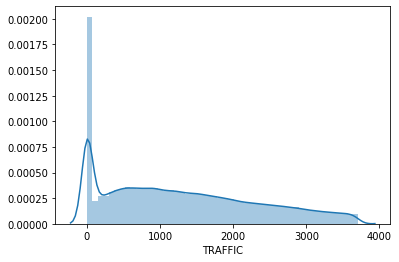

In [34]:
# Finding optimal daily traffic

mta_traffic_under_percentileX = mta_entries_exits[mta_entries_exits["TRAFFIC"]<(mta_entries_exits.TRAFFIC.quantile(0.90))]
ax=sns.distplot(mta_traffic_under_percentileX["TRAFFIC"])

In [35]:
mta_entries_exits["TRAFFIC"].quantile(0.90)

3714.0

In [36]:
mta_traffic_under_percentileX.describe()

,ENTRIES,EXITS,TRAFFIC
count,655236.000000,655236.000000,655236.000000
mean,770.685925,541.028017,1311.713943
std,697.398262,561.187885,1029.728822
min,0.000000,0.000000,0.000000
25%,178.000000,101.000000,431.000000
50%,611.000000,370.000000,1162.000000
75%,1200.000000,804.000000,2059.000000
max,3624.000000,3710.000000,3713.000000


In [37]:
#Setting median values to giant values
mta_entries_exits["TRAFFIC"][mta_entries_exits["TRAFFIC"] > (mta_entries_exits.TRAFFIC.quantile(0.90))] = mta_entries_exits["TRAFFIC"].median() 


/Users/yalinyener/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [38]:
#Checking new values for "TRAFFIC" column

mta_entries_exits["TRAFFIC"].describe()

count    728054.000000
mean       1314.435613
std         977.145314
min           0.000000
25%         512.000000
50%        1337.000000
75%        1939.000000
max        3714.000000
Name: TRAFFIC, dtype: float64

In [39]:
mta_entries_exits.sort_values("TRAFFIC", ascending=False).head(10)

,STATION,TURNSTILE,DATE,NAMEOFDAY,ENTRIES,EXITS,TRAFFIC
410847,DELANCEY/ESSEX,N525-R142-01-00-04,02/04/2019,Monday,2096,1618,3714
505452,HOYT-SCHER,N108-R217-00-00-03,05/29/2019,Wednesday,1499,2215,3714
413695,DYCKMAN ST,R186-R036-00-00-00,01/30/2019,Wednesday,1562,2152,3714
505411,HOYT-SCHER,N108-R217-00-00-03,04/18/2019,Thursday,1446,2268,3714
718879,WORLD TRADE CTR,N094-R029-01-00-00,05/24/2019,Friday,1248,2466,3714
132994,34 ST-PENN STA,N073-R013-02-00-03,02/13/2019,Wednesday,1390,2324,3714
39561,145 ST,N020-R101-00-00-03,01/24/2019,Thursday,1705,2009,3714
507238,HUNTS POINT AV,R412-R146-00-00-00,05/03/2019,Friday,1842,1872,3714
145214,40 ST LOWERY ST,R518-R261-00-00-00,01/30/2019,Wednesday,894,2820,3714
678971,TIMES SQ-42 ST,A021-R032-01-00-05,01/10/2019,Thursday,1081,2633,3714


In [40]:
# Finding top 7 busiest stations based on traffic

mta_top7 = mta_entries_exits.groupby("STATION").sum().sort_values("TRAFFIC",ascending=False).head(7)
mta_top7 = mta_top7.reset_index()
mta_top7

,STATION,ENTRIES,EXITS,TRAFFIC
0,34 ST-PENN STA,136764780,200978938,25593350
1,FULTON ST,1247568281,1408264805,18832051
2,23 ST,61142042,1458528722,18146768
3,GRD CNTRL-42 ST,341402946,1546276276,16016348
4,86 ST,959741179,303488591,14657433
5,34 ST-HERALD SQ,280150892,244387095,14252706
6,TIMES SQ-42 ST,50359532,103271882,13889003


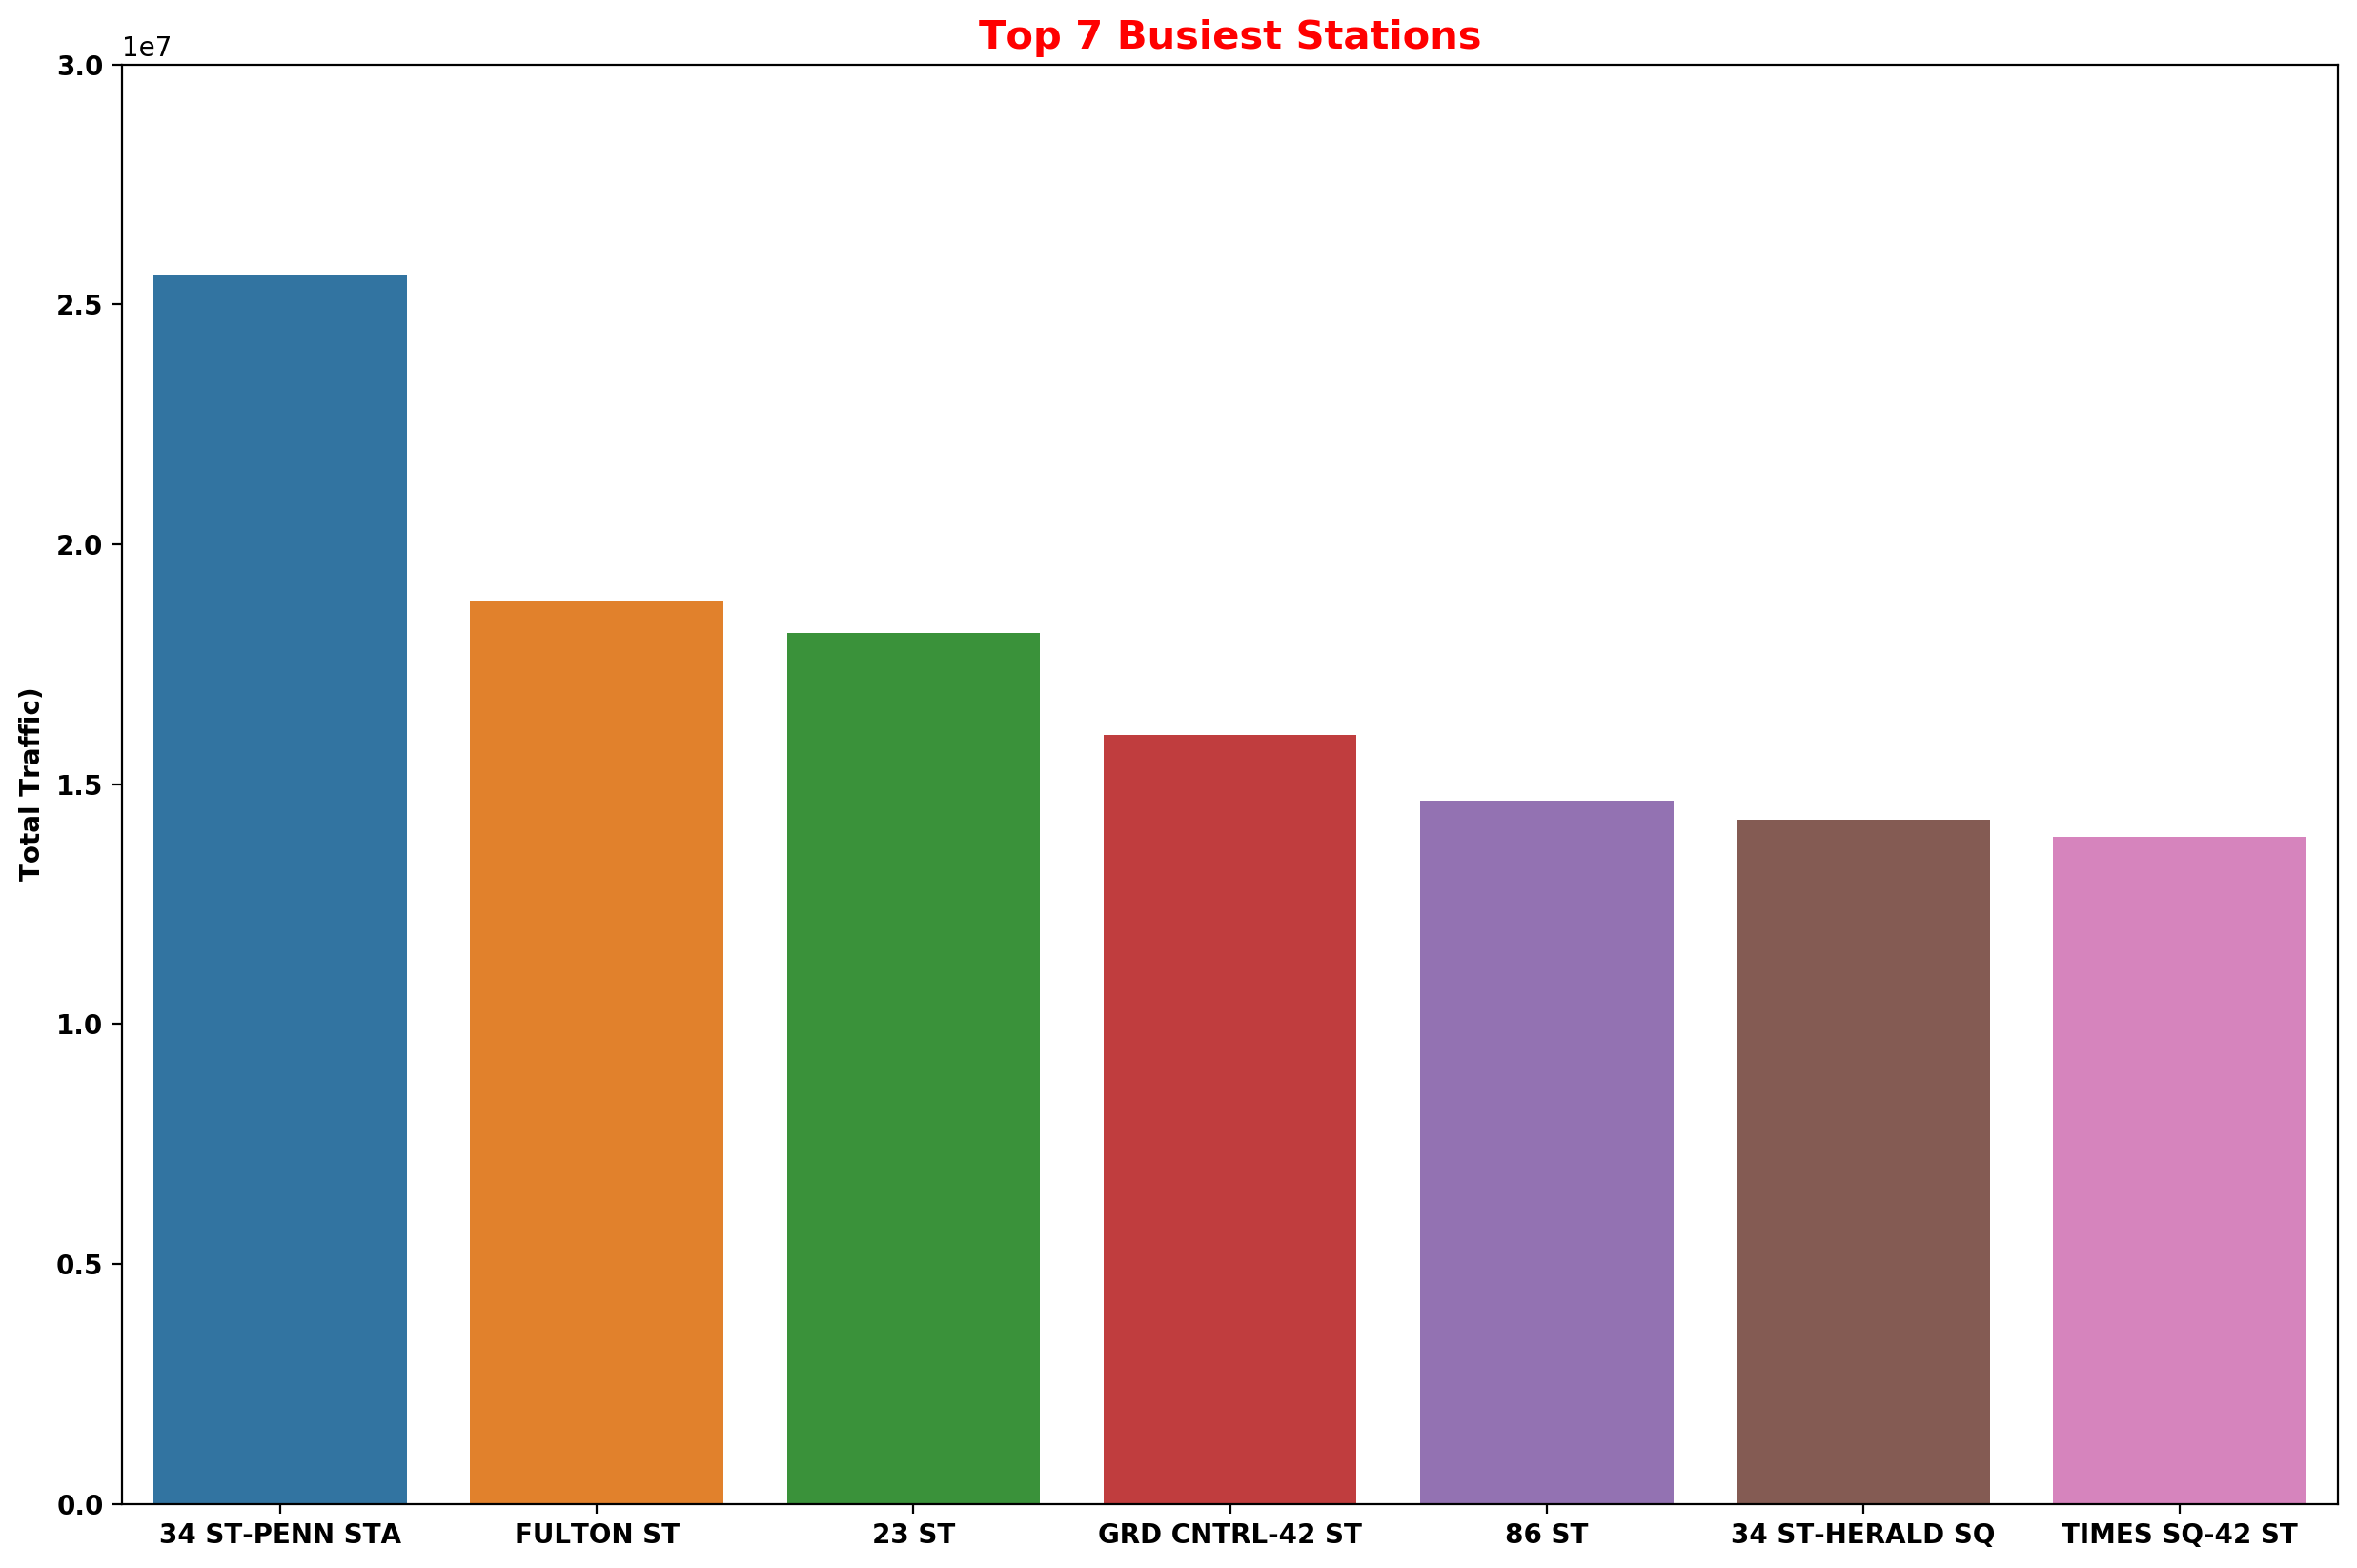

In [41]:
#Barplot for Top 7 Busiest Stations

plt.figure(figsize=(15,10),dpi=200),
plt.style.use('default')
ax = sns.barplot(x="STATION", y="TRAFFIC", data=mta_top7)
plt.title("Top 7 Busiest Stations", weight="bold", c="red", fontsize=15)
plt.xlabel("",weight="bold",c="k")
plt.xticks(rotation=0, weight="bold")
plt.ylabel("Total Traffic)",weight= "bold",c="k")
plt.ylim(0,30000000)
plt.yticks(weight="bold")
plt.savefig('images/01_Top7BusiesStationsBarPlot.png', dpi=200)
plt.show()

In [42]:
# Finding overall busiest day based on traffic

mta_busiest_day = mta_entries_exits.groupby("NAMEOFDAY").sum().sort_values("TRAFFIC",ascending=False)
mta_busiest_day = mta_busiest_day.reset_index()
mta_busiest_day


,NAMEOFDAY,ENTRIES,EXITS,TRAFFIC
0,Wednesday,11306781039,6808612415,160998291
1,Thursday,9823687333,7138397560,160558990
2,Friday,8901343359,4312223082,158211143
3,Tuesday,4171175196,6443719717,156970284
4,Monday,2925417748,2652458423,143768592
5,Saturday,824702021,552776375,97549070
6,Sunday,3122047140,986299951,78923736


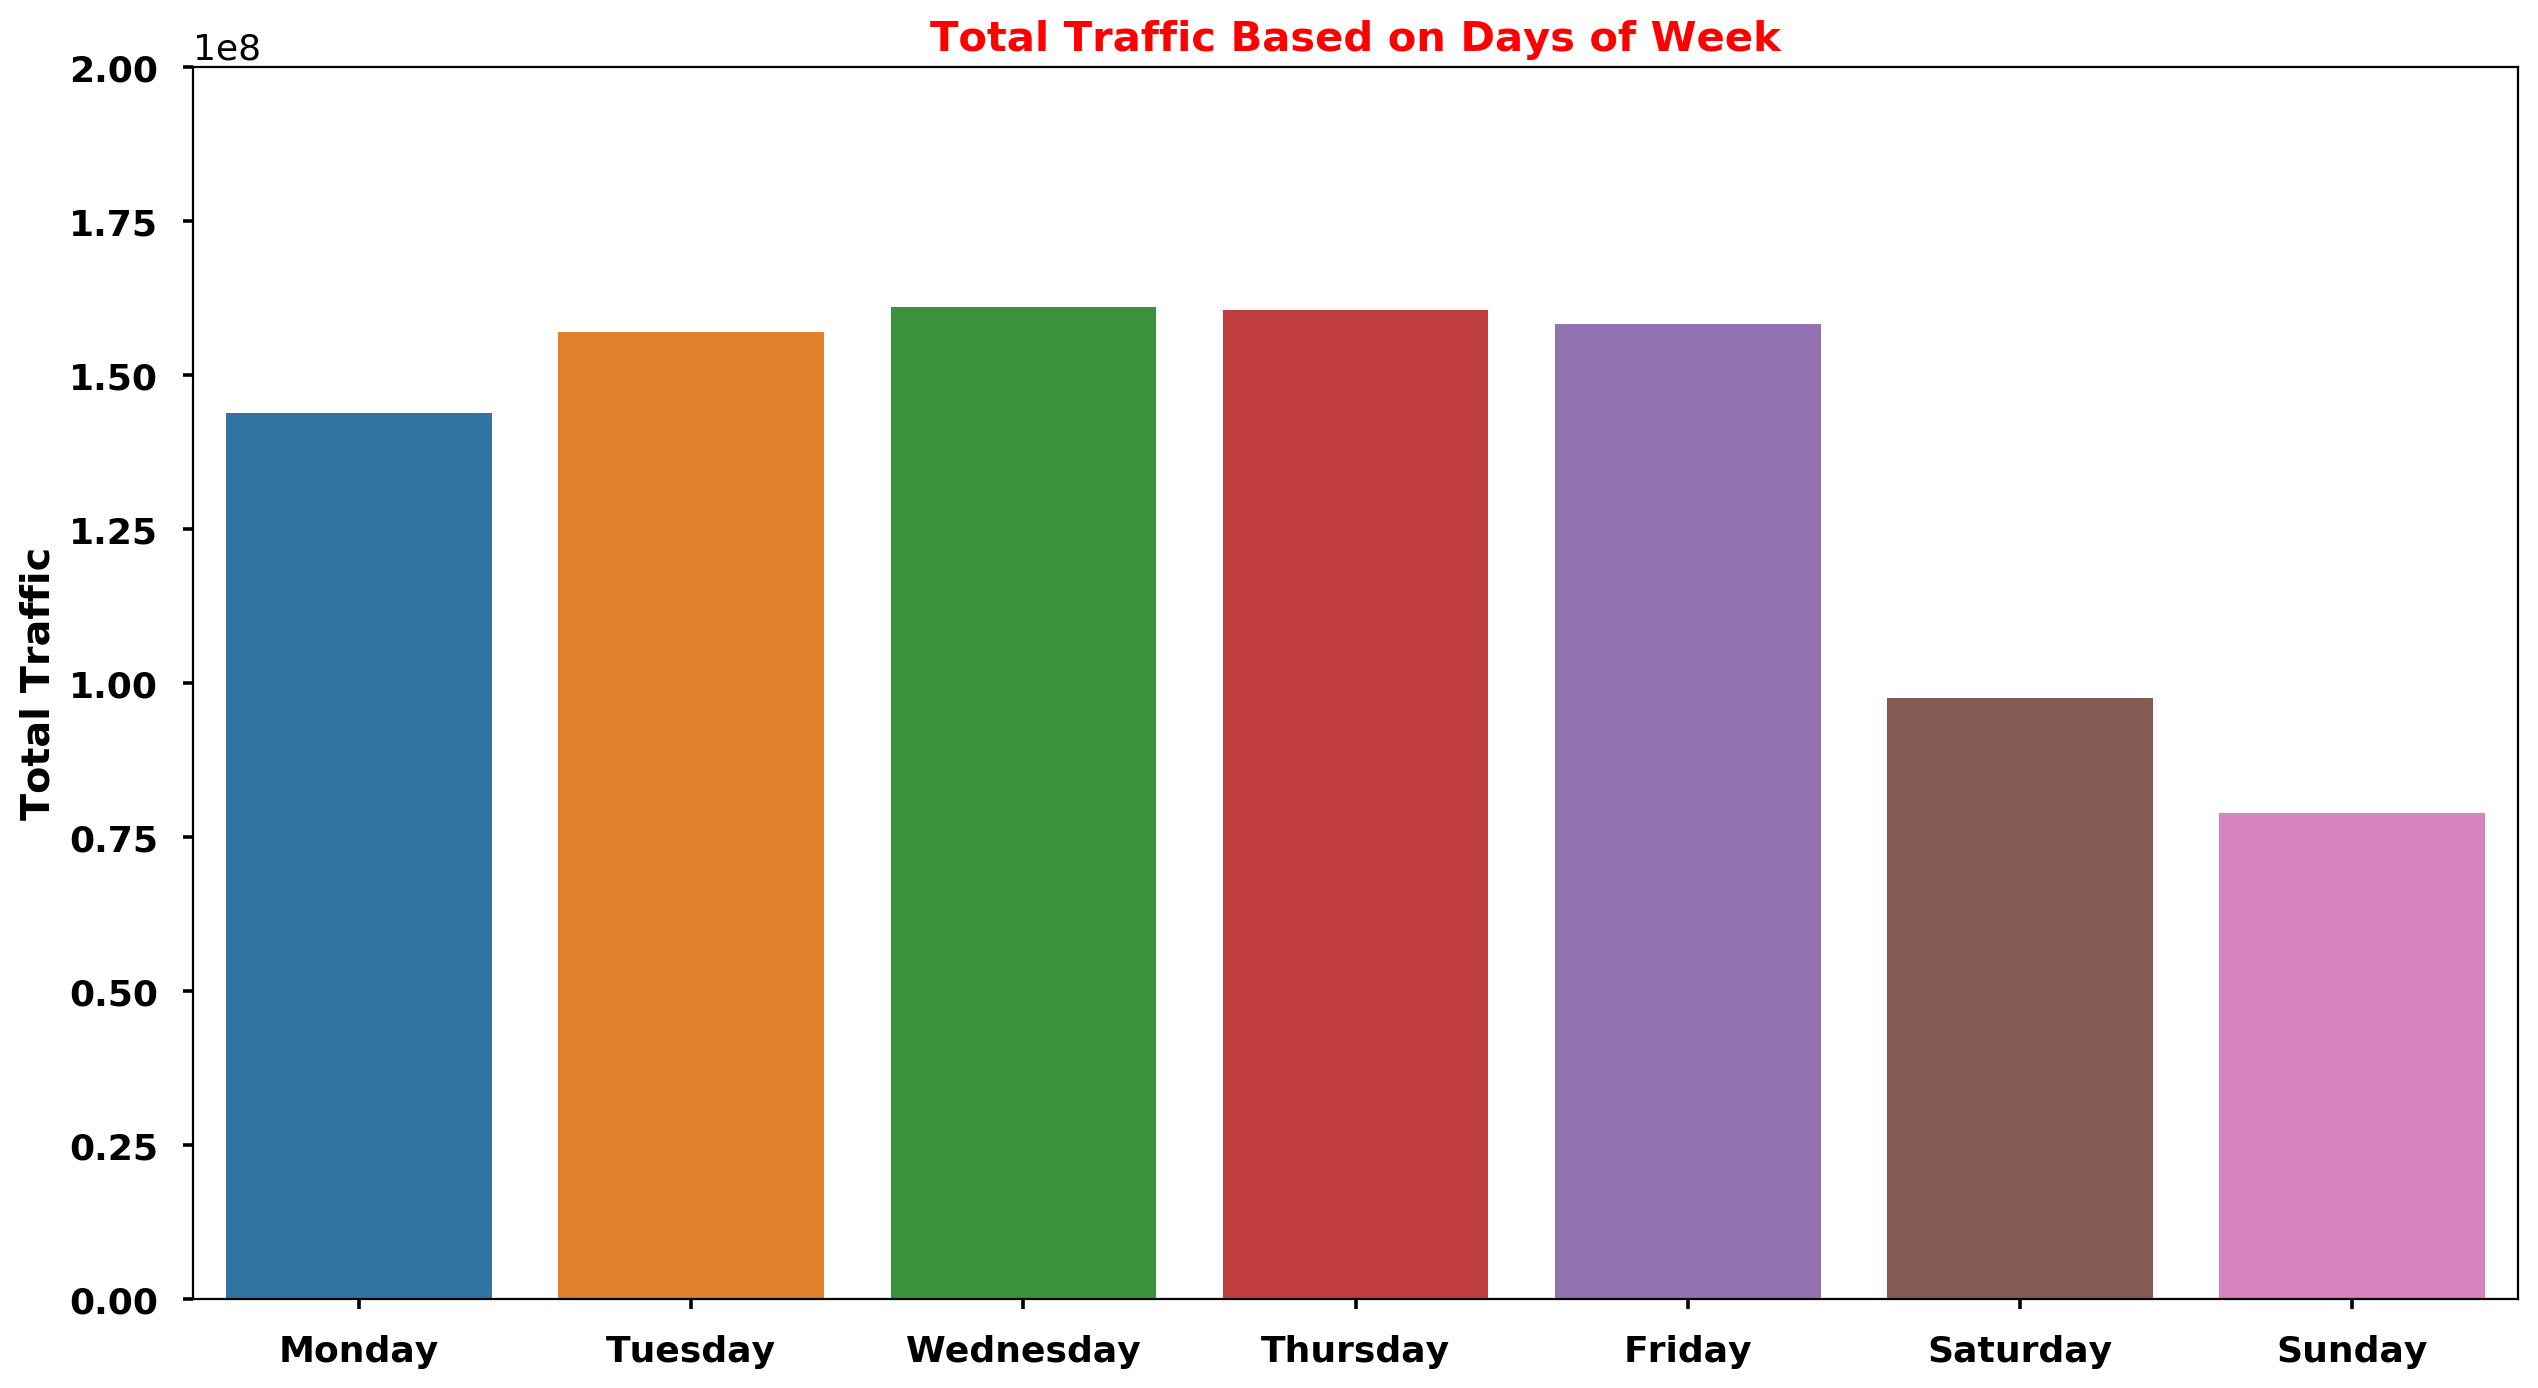

In [43]:
#Barplot for total traffic
plt.figure(figsize=(15,8),dpi=200),
plt.style.use('seaborn-talk')

ax = sns.barplot(x="NAMEOFDAY",y="TRAFFIC",data=mta_busiest_day, order=["Monday","Tuesday","Wednesday","Thursday",
                                                                       "Friday","Saturday","Sunday"])

plt.title("Total Traffic Based on Days of Week", weight="bold", c="red",fontsize=15)
plt.xlabel("")
plt.ylabel("Total Traffic",weight= "bold")
plt.yticks(weight="bold")
plt.xticks(weight="bold")
plt.ylim(0,200000000)
plt.savefig('images/02_TotalTrafficPerDayBarPlot.png', dpi=200)
plt.show()


In [44]:
top7_station_list = mta_top7["STATION"]
top7_station_list

0     34 ST-PENN STA
1          FULTON ST
2              23 ST
3    GRD CNTRL-42 ST
4              86 ST
5    34 ST-HERALD SQ
6     TIMES SQ-42 ST
Name: STATION, dtype: object

In [45]:
#Daily Usage for Top 7 Stations
mta_top7_daily = mta_entries_exits.groupby(["STATION","NAMEOFDAY"]).sum()

mta_top7_daily = mta_top7_daily.reset_index()

mta_top7_daily = mta_top7_daily[(mta_top7_daily["STATION"]=="34 ST-PENN STA") 
                  | (mta_top7_daily["STATION"]=="FULTON ST")
                  | (mta_top7_daily["STATION"]=='23 ST')
                  | (mta_top7_daily["STATION"]=='GRD CNTRL-42 ST')
                  | (mta_top7_daily["STATION"]=="86 ST")
                  | (mta_top7_daily["STATION"]=="34 ST-HERALD SQ")
                  | (mta_top7_daily["STATION"]=="TIMES SQ-42 ST")]


mta_top7_daily = mta_top7_daily.reset_index()

mta_top7_daily.head(10)

,index,STATION,NAMEOFDAY,ENTRIES,EXITS,TRAFFIC
0,322,23 ST,Friday,10386908,23212182,3103210
1,323,23 ST,Monday,4116005,3419985,2801749
2,324,23 ST,Saturday,1010871,797989,1790481
3,325,23 ST,Sunday,12895278,15128519,1314159
4,326,23 ST,Thursday,2465612,1894113,3064068
5,327,23 ST,Tuesday,6344036,1365730759,2999328
6,328,23 ST,Wednesday,23923332,48345175,3073773
7,413,34 ST-HERALD SQ,Friday,2471655,2403555,2192143
8,414,34 ST-HERALD SQ,Monday,2158614,2025777,2059172
9,415,34 ST-HERALD SQ,Saturday,1294274,1294518,1814556


In [46]:
#Reindex for top7 daily data frame

mta_top7_daily_order = mta_top7_daily.reindex(index = [1,5,6,4,0,2,3,8,12,13,11,7,9,10,15,19,20,18,14,16,17,22,26,27,25,21,23,24,29,33,34,32,28,30,31,36,40,41,39,35,37,38,43,47,48,46,42,44,45])

mta_top7_daily_order.head(10)

,index,STATION,NAMEOFDAY,ENTRIES,EXITS,TRAFFIC
1,323,23 ST,Monday,4116005,3419985,2801749
5,327,23 ST,Tuesday,6344036,1365730759,2999328
6,328,23 ST,Wednesday,23923332,48345175,3073773
4,326,23 ST,Thursday,2465612,1894113,3064068
0,322,23 ST,Friday,10386908,23212182,3103210
2,324,23 ST,Saturday,1010871,797989,1790481
3,325,23 ST,Sunday,12895278,15128519,1314159
8,414,34 ST-HERALD SQ,Monday,2158614,2025777,2059172
12,418,34 ST-HERALD SQ,Tuesday,135380811,117635615,2144725
13,419,34 ST-HERALD SQ,Wednesday,2533189,2397021,2160383


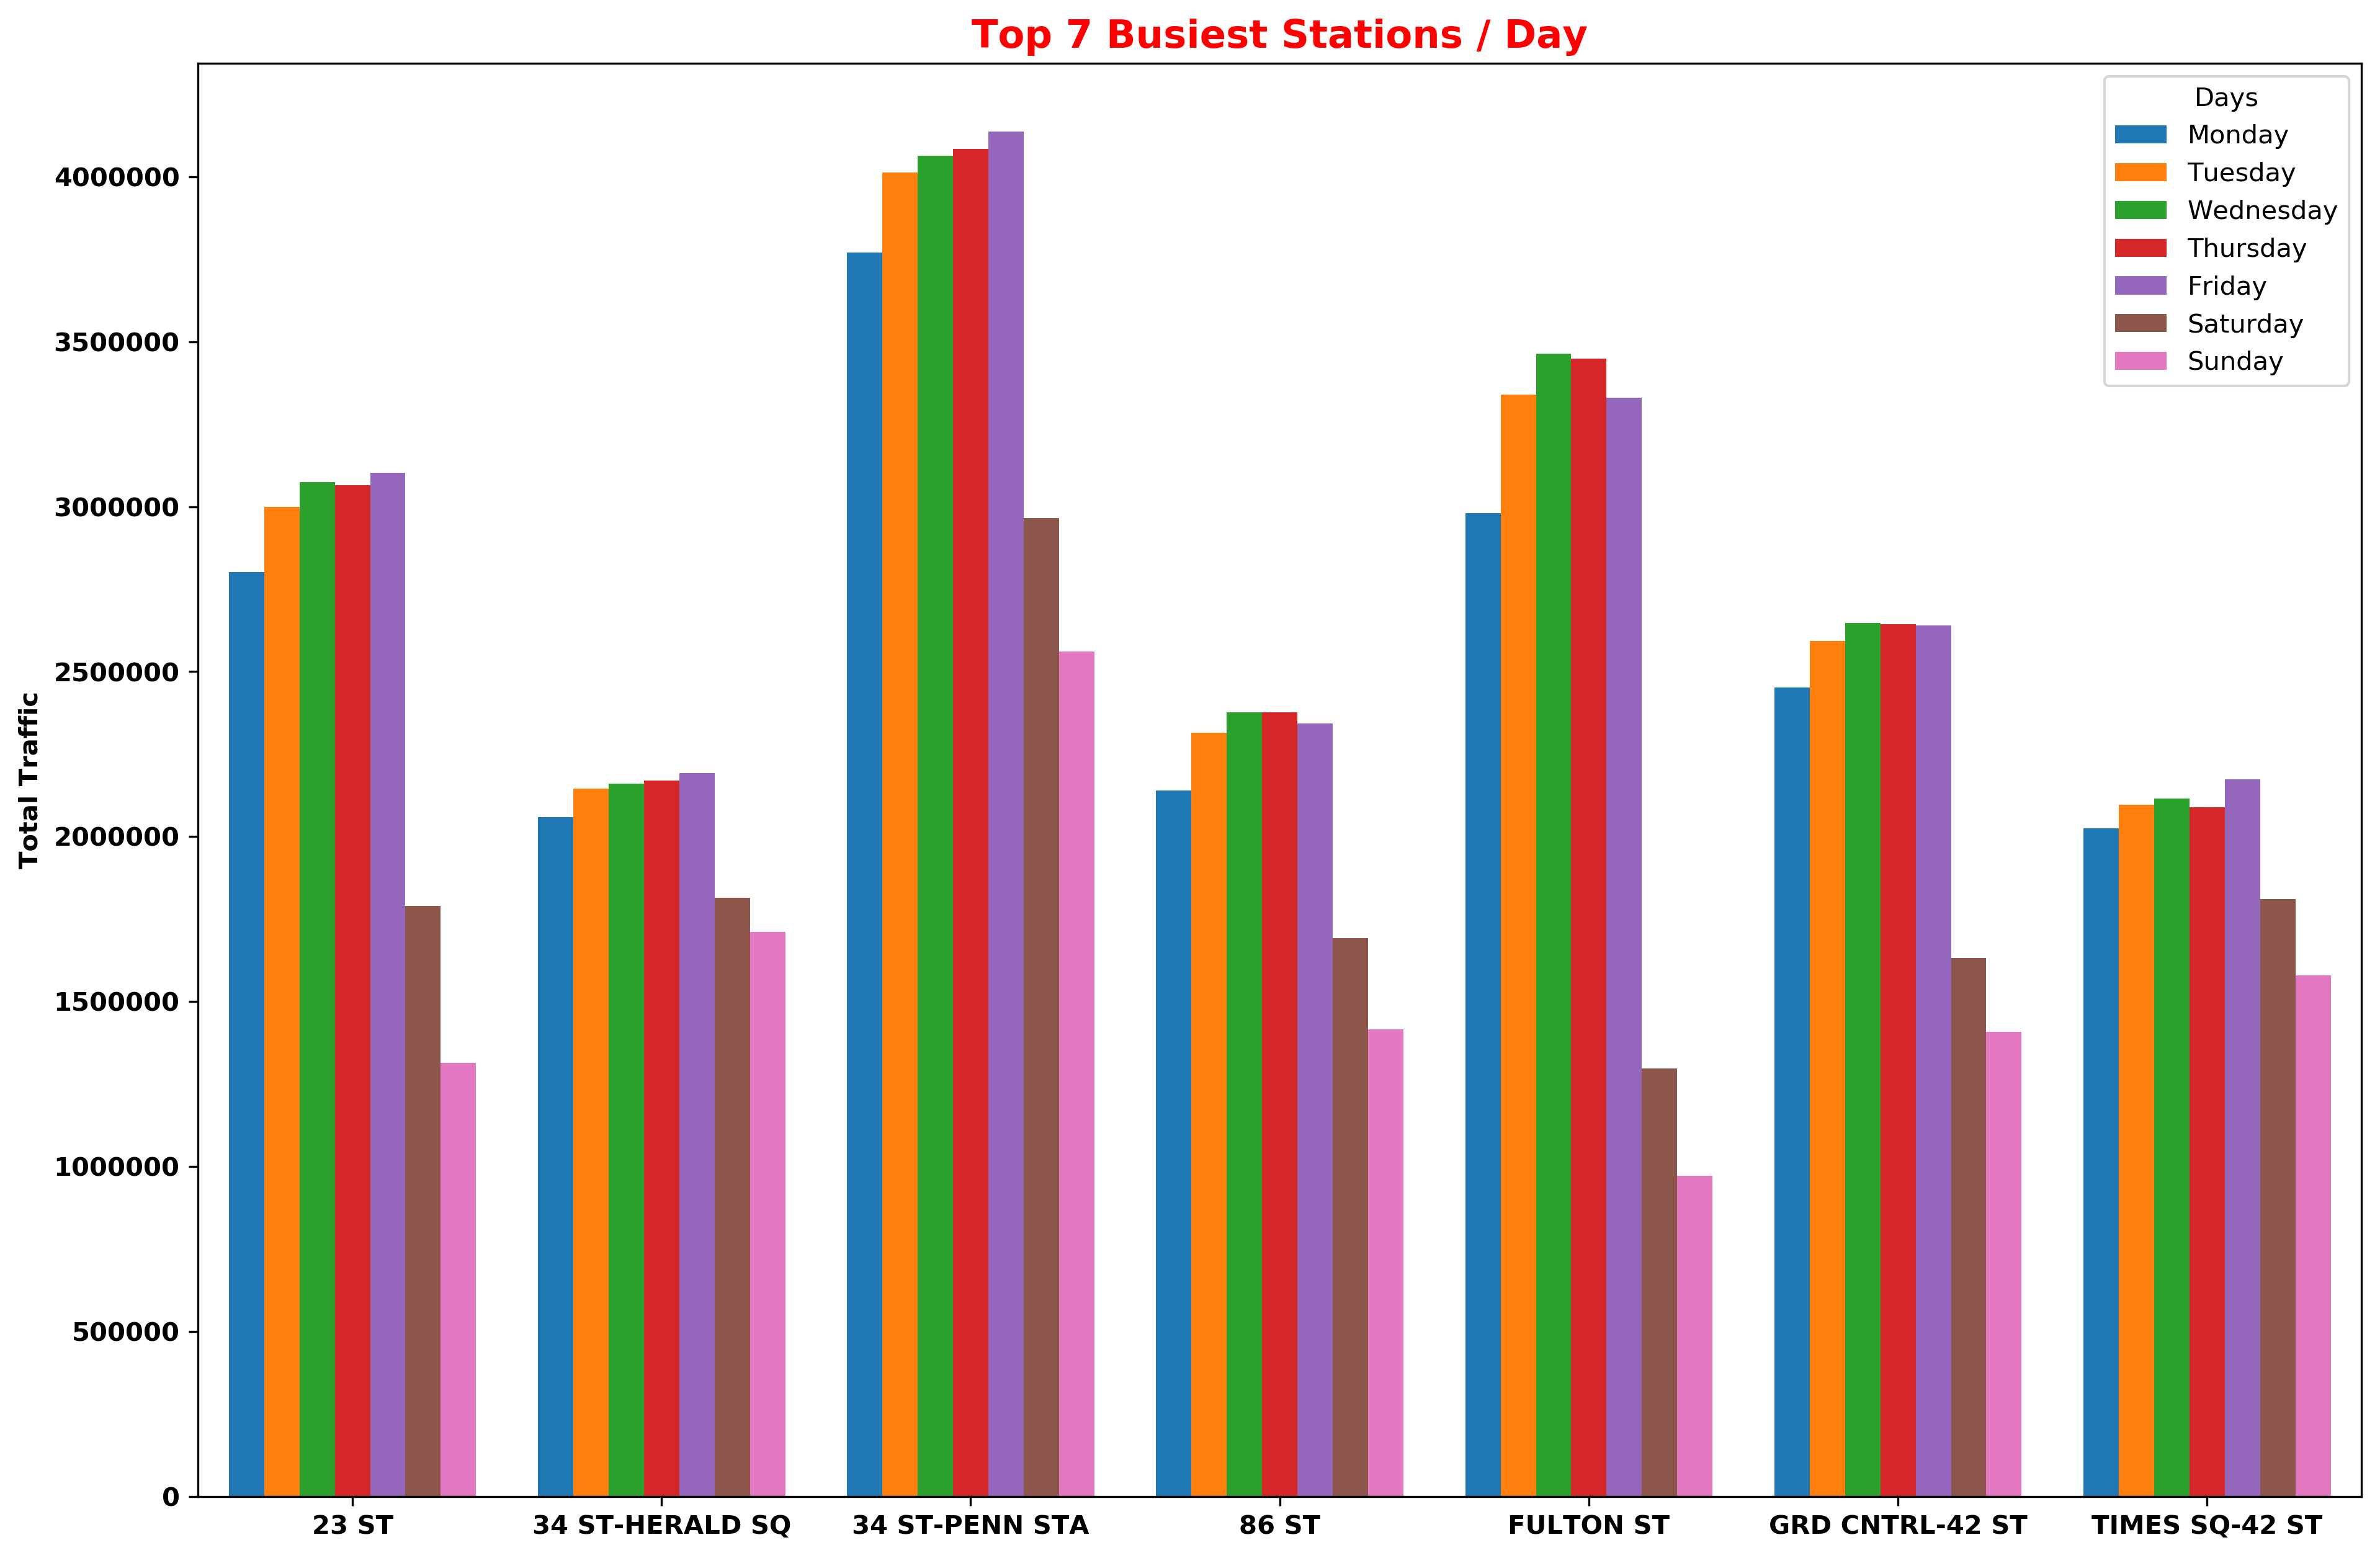

In [47]:
#Barplot for Top 7 Busiest Stations per Day

plt.figure(figsize=(15,10),dpi=300),
plt.style.use('default')
ax = sns.barplot(x="STATION", y="TRAFFIC", hue="NAMEOFDAY",data=mta_top7_daily_order, saturation=1)
plt.title("Top 7 Busiest Stations / Day", weight="bold", c="red", fontsize=15)
plt.xlabel("",weight="bold",c="k")
plt.xticks(rotation=0, weight="bold")
plt.ylabel("Total Traffic",weight= "bold",c="k")
plt.yticks(weight="bold")
plt.legend(title="Days")
plt.savefig('images/03_Top7BusiestStationsPerDayBarPlot.png', dpi=200)
plt.show()

In [48]:
#Creating Pivot table for heatmap

mta_top7_heatmap = mta_top7_daily_order.groupby(["STATION","NAMEOFDAY"]).TRAFFIC.mean().reset_index()

mta_top7_heatmap = mta_top7_heatmap.pivot("NAMEOFDAY","STATION","TRAFFIC")

mta_top7_heatmap = mta_top7_heatmap.reindex(index = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])

mta_top7_heatmap

STATION,23 ST,34 ST-HERALD SQ,34 ST-PENN STA,86 ST,FULTON ST,GRD CNTRL-42 ST,TIMES SQ-42 ST
NAMEOFDAY,,,,,,,
Monday,2801749,2059172,3770175,2139936,2981244,2451241,2024895
Tuesday,2999328,2144725,4012444,2314433,3340265,2593276,2096823
Wednesday,3073773,2160383,4063172,2376680,3464067,2646575,2115425
Thursday,3064068,2170720,4084697,2376204,3448462,2643513,2088193
Friday,3103210,2192143,4137139,2342906,3329622,2640783,2173738
Saturday,1790481,1814556,2964682,1692383,1296698,1632372,1810083
Sunday,1314159,1711007,2561041,1414891,971693,1408588,1579846


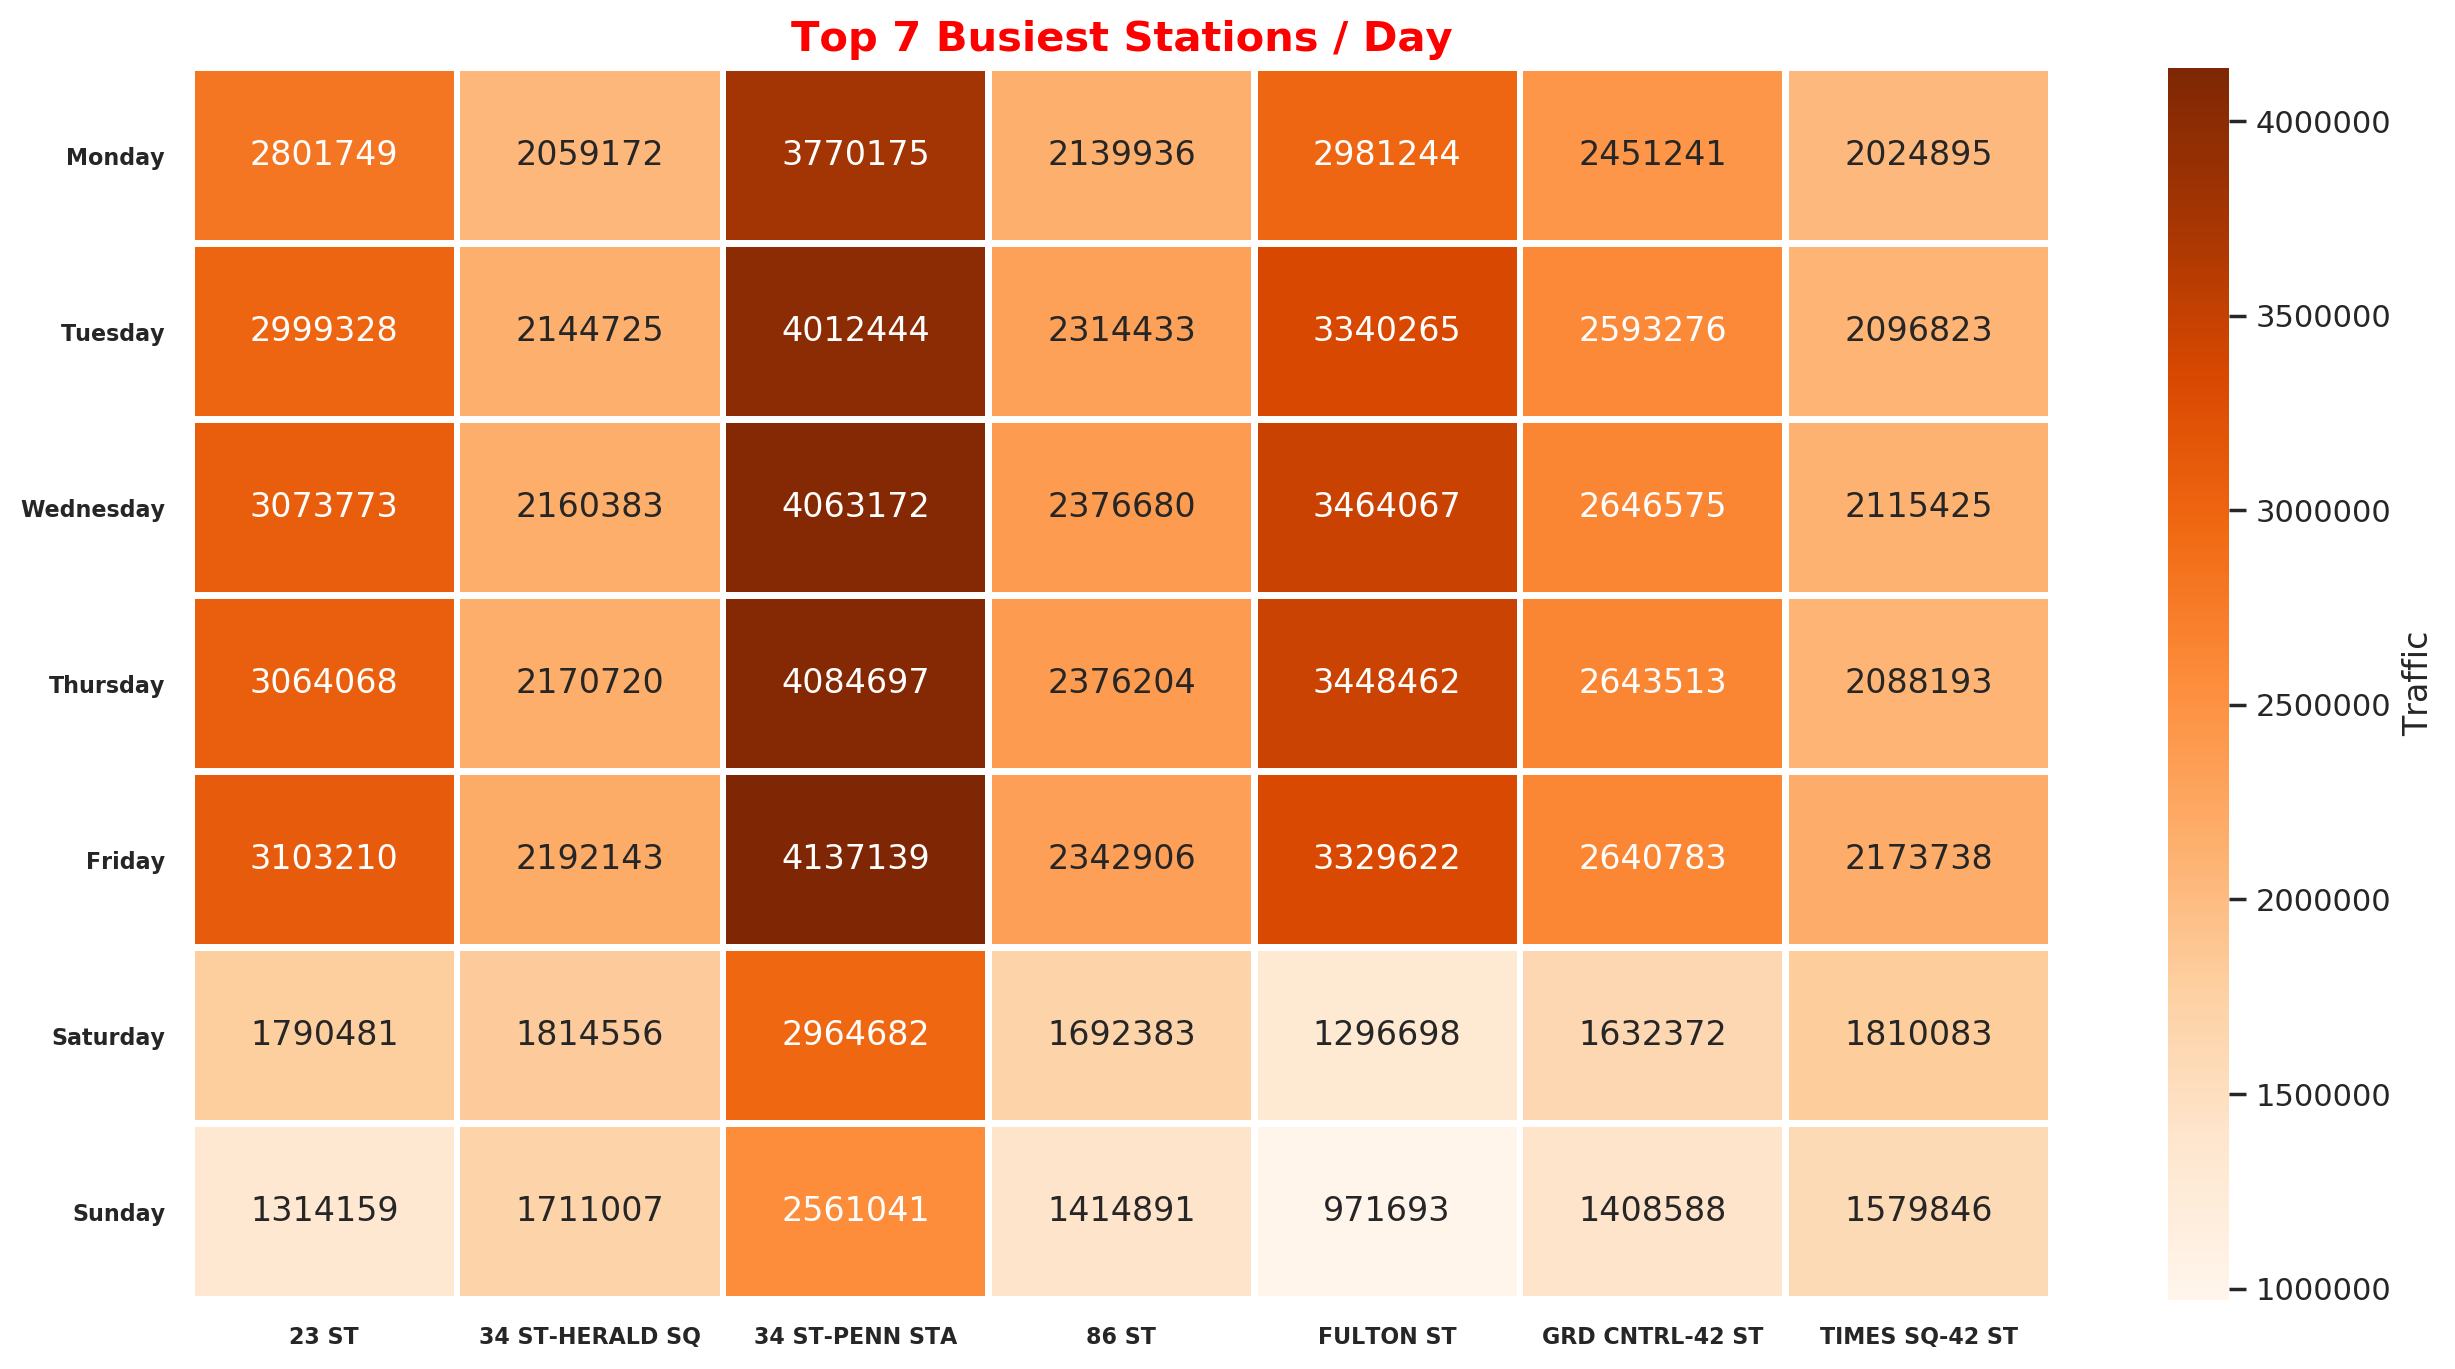

In [89]:
#Heatmap for top7 stations per day

plt.figure(figsize=(15,8),dpi=200),
sns.set(font_scale=1)
sns.heatmap(mta_top7_heatmap,annot=True,fmt="d", linewidths=2, cmap="Oranges",cbar_kws={'label': 'Traffic'})
plt.style.use('default')
plt.ylabel("")
plt.xlabel("")
plt.yticks(weight="bold",rotation=0, size=8)
plt.xticks(weight="bold",rotation=0,size=8)
plt.title("Top 7 Busiest Stations / Day",weight="bold",c="red", fontsize=15)
plt.savefig('images/04_Top7BusiesStationsPerDayHeatmap.png', dpi=200)
plt.show()

In [50]:
#Calculating busiest time
mta_time = mta.sort_values(["STATION","TURNSTILE","DATETIME"]).reset_index()
mta_time_group = mta_time.groupby(["TURNSTILE"])

mta_time["DIF_ENTRIES"] = mta_time_group["ENTRIES"].transform(pd.Series.diff)
mta_time["DIF_EXITS"] = mta_time_group["EXITS"].transform(pd.Series.diff)

mta_time.head(10)

,index,STATION,TURNSTILE,DATE,TIME,DATETIME,NAMEOFDAY,ENTRIES,EXITS,DIF_ENTRIES,DIF_EXITS
0,30508,1 AV,H007-R248-00-00-00,01/01/2019,03:00:00,2019-01-01 03:00:00,Tuesday,14276525,16005314,NaN,NaN
1,30509,1 AV,H007-R248-00-00-00,01/01/2019,07:00:00,2019-01-01 07:00:00,Tuesday,14276565,16005531,40.0,217.0
2,30510,1 AV,H007-R248-00-00-00,01/01/2019,11:00:00,2019-01-01 11:00:00,Tuesday,14276733,16005804,168.0,273.0
3,30511,1 AV,H007-R248-00-00-00,01/01/2019,15:00:00,2019-01-01 15:00:00,Tuesday,14277178,16006393,445.0,589.0
4,30512,1 AV,H007-R248-00-00-00,01/01/2019,19:00:00,2019-01-01 19:00:00,Tuesday,14277679,16007007,501.0,614.0
5,30513,1 AV,H007-R248-00-00-00,01/01/2019,23:00:00,2019-01-01 23:00:00,Tuesday,14277982,16007353,303.0,346.0
6,30514,1 AV,H007-R248-00-00-00,01/02/2019,03:00:00,2019-01-02 03:00:00,Wednesday,14278032,16007445,50.0,92.0
7,30515,1 AV,H007-R248-00-00-00,01/02/2019,07:00:00,2019-01-02 07:00:00,Wednesday,14278106,16007740,74.0,295.0
8,30516,1 AV,H007-R248-00-00-00,01/02/2019,11:00:00,2019-01-02 11:00:00,Wednesday,14279160,16009110,1054.0,1370.0
9,30517,1 AV,H007-R248-00-00-00,01/02/2019,15:00:00,2019-01-02 15:00:00,Wednesday,14279791,16009914,631.0,804.0


In [51]:
#Checking Diff values for entries and exits before setting new values
print("Descriptive Statistics for DIF_ENTRIES column:")
print(mta_time["DIF_ENTRIES"].describe())
print("Descriptive Statistics for DIF_EXITS column:")
print(mta_time["DIF_EXITS"].describe())

Descriptive Statistics for DIF_ENTRIES column:
count    4.389476e+06
mean     2.037309e+03
std      3.939587e+06
min     -2.071639e+09
25%      8.000000e+00
50%      6.700000e+01
75%      2.250000e+02
max      2.088503e+09
Name: DIF_ENTRIES, dtype: float64
Descriptive Statistics for DIF_EXITS column:
count    4.389476e+06
mean     7.239409e+02
std      3.102654e+06
min     -1.897280e+09
25%      7.000000e+00
50%      4.800000e+01
75%      1.560000e+02
max      2.107590e+09
Name: DIF_EXITS, dtype: float64


In [52]:
print("Negative values for DIF_ENTRIES column: ")
print(len(mta_time[mta_time["DIF_ENTRIES"]<0]))
print("Negative values for DIF_EXITS column:")
print(len(mta_time[mta_time["DIF_EXITS"]<0]))

Negative values for DIF_ENTRIES column: 
39327
Negative values for DIF_EXITS column:
31602


In [53]:
#Setting new values (median) for negative and higher than quantile (0.95)

mta_time["DIF_ENTRIES"] = mta_time["DIF_ENTRIES"].fillna(0)
mta_time["DIF_EXITS"] = mta_time["DIF_EXITS"].fillna(0)
mta_time['DIF_ENTRIES'][mta_time['DIF_ENTRIES'] < 0] = (mta_time["DIF_ENTRIES"].median())
mta_time['DIF_EXITS'][mta_time['DIF_EXITS'] < 0] = (mta_time["DIF_EXITS"].median())
mta_time['DIF_ENTRIES'][mta_time['DIF_ENTRIES'] > (mta_time["DIF_ENTRIES"].quantile(0.95))] = (mta_time["DIF_ENTRIES"].median()) 
mta_time['DIF_EXITS'][mta_time['DIF_EXITS'] > (mta_time["DIF_EXITS"].quantile(0.95))] = (mta_time["DIF_EXITS"].median()) 

/Users/yalinyener/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/yalinyener/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/yalinyener/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/yalinyener/opt/anaconda

In [54]:
#Checking Diff values for entries and exits after setting new values
print("Descriptive Statistics for DIF_ENTRIES column:")
print(mta_time["DIF_ENTRIES"].describe())
print("Descriptive Statistics for DIF_EXITS column:")
print(mta_time["DIF_EXITS"].describe())

Descriptive Statistics for DIF_ENTRIES column:
count    4.394408e+06
mean     1.220328e+02
std      1.503640e+02
min      0.000000e+00
25%      9.000000e+00
50%      6.700000e+01
75%      1.810000e+02
max      6.630000e+02
Name: DIF_ENTRIES, dtype: float64
Descriptive Statistics for DIF_EXITS column:
count    4.394408e+06
mean     8.932343e+01
std      1.143050e+02
min      0.000000e+00
25%      8.000000e+00
50%      4.800000e+01
75%      1.230000e+02
max      5.390000e+02
Name: DIF_EXITS, dtype: float64


In [55]:
#Calculating TRAFFIC column DIF_ENTRIES + DIF_EXITS
mta_time["TRAFFIC"] = mta_time["DIF_ENTRIES"] + mta_time["DIF_EXITS"]
mta_time.head(10)

,index,STATION,TURNSTILE,DATE,TIME,DATETIME,NAMEOFDAY,ENTRIES,EXITS,DIF_ENTRIES,DIF_EXITS,TRAFFIC
0,30508,1 AV,H007-R248-00-00-00,01/01/2019,03:00:00,2019-01-01 03:00:00,Tuesday,14276525,16005314,0.0,0.0,0.0
1,30509,1 AV,H007-R248-00-00-00,01/01/2019,07:00:00,2019-01-01 07:00:00,Tuesday,14276565,16005531,40.0,217.0,257.0
2,30510,1 AV,H007-R248-00-00-00,01/01/2019,11:00:00,2019-01-01 11:00:00,Tuesday,14276733,16005804,168.0,273.0,441.0
3,30511,1 AV,H007-R248-00-00-00,01/01/2019,15:00:00,2019-01-01 15:00:00,Tuesday,14277178,16006393,445.0,48.0,493.0
4,30512,1 AV,H007-R248-00-00-00,01/01/2019,19:00:00,2019-01-01 19:00:00,Tuesday,14277679,16007007,501.0,48.0,549.0
5,30513,1 AV,H007-R248-00-00-00,01/01/2019,23:00:00,2019-01-01 23:00:00,Tuesday,14277982,16007353,303.0,346.0,649.0
6,30514,1 AV,H007-R248-00-00-00,01/02/2019,03:00:00,2019-01-02 03:00:00,Wednesday,14278032,16007445,50.0,92.0,142.0
7,30515,1 AV,H007-R248-00-00-00,01/02/2019,07:00:00,2019-01-02 07:00:00,Wednesday,14278106,16007740,74.0,295.0,369.0
8,30516,1 AV,H007-R248-00-00-00,01/02/2019,11:00:00,2019-01-02 11:00:00,Wednesday,14279160,16009110,67.0,48.0,115.0
9,30517,1 AV,H007-R248-00-00-00,01/02/2019,15:00:00,2019-01-02 15:00:00,Wednesday,14279791,16009914,631.0,48.0,679.0


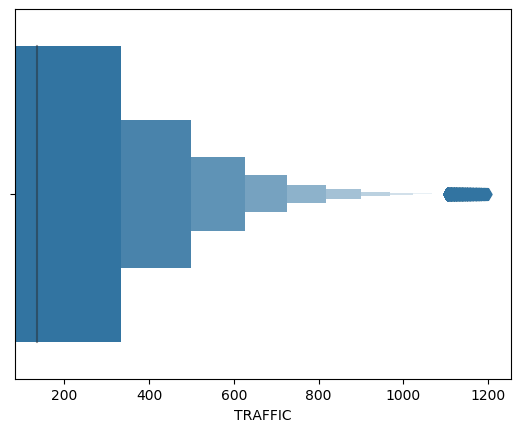

In [56]:
sns.boxenplot(mta_time["TRAFFIC"])

In [57]:
mta_time.groupby(["STATION"]).sum().sort_values("TRAFFIC", ascending=False).head(7)

,index,ENTRIES,EXITS,DIF_ENTRIES,DIF_EXITS,TRAFFIC
STATION,,,,,,
34 ST-PENN STA,8223702618,3553264755271,3757711248727,13778745.0,10689950.0,24468695.0
23 ST,6165167551,5396339801230,5669192421356,9675497.0,7729406.0,17404903.0
FULTON ST,7729610960,3950882565417,4024736982148,8652135.0,6726131.0,15378266.0
GRD CNTRL-42 ST,9606311001,2220289633343,2117582801802,8005223.0,6667743.0,14672966.0
34 ST-HERALD SQ,3584066328,4307758837019,5402831394188,7247160.0,6828768.0,14075928.0
125 ST,4777077920,4980160629760,2966373052389,7798203.0,6213083.0,14011286.0
42 ST-PORT AUTH,2405035703,7057744704941,5768779360597,8669231.0,5236050.0,13905281.0


In [58]:
mta_time_a=mta_time[mta_time["STATION"]=="34 ST-PENN STA"]
stations_day_time = mta_time_a[['STATION', 'TIME', 'NAMEOFDAY','TRAFFIC']]
stations_day_time_group = stations_day_time.groupby(['STATION','NAMEOFDAY','TIME'], as_index=False)
stations_day_time_group = stations_day_time_group[['TRAFFIC']].sum()
stations_day_time_group['TIME'] = pd.to_datetime(stations_day_time_group['TIME'], format='%H:%M:%S')
rounded_day_time = stations_day_time_group.set_index('TIME').groupby(['STATION','NAMEOFDAY'])
rounded_day_time = rounded_day_time.resample("4H").sum()
rounded_day_time = rounded_day_time.reset_index()
rounded_day_time.head(6)

,STATION,NAMEOFDAY,TIME,TRAFFIC
0,34 ST-PENN STA,Friday,1900-01-01 00:00:00,408658.0
1,34 ST-PENN STA,Friday,1900-01-01 04:00:00,168538.0
2,34 ST-PENN STA,Friday,1900-01-01 08:00:00,708526.0
3,34 ST-PENN STA,Friday,1900-01-01 12:00:00,849480.0
4,34 ST-PENN STA,Friday,1900-01-01 16:00:00,933888.0
5,34 ST-PENN STA,Friday,1900-01-01 20:00:00,892497.0


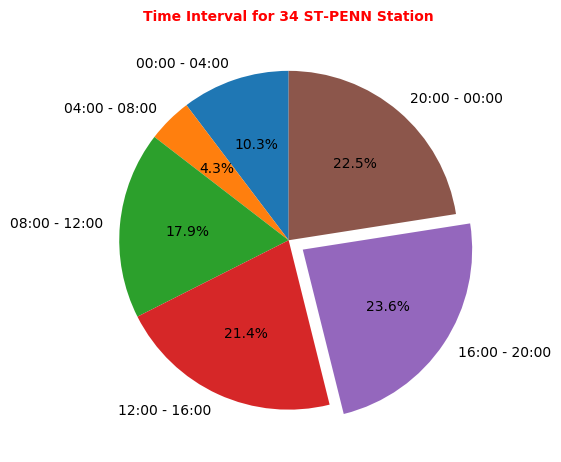

In [72]:
plt.style.use('seaborn-notebook')
fig1, ax1 = plt.subplots()
time = '00:00 - 04:00', '04:00 - 08:00', '08:00 - 12:00', '12:00 - 16:00','16:00 - 20:00','20:00 - 00:00'
traffic = [408658, 168538, 709018, 849972, 934872 ,892989]
explode = (0, 0, 0, 0, 0.1 ,0)  
ax1.pie(traffic, explode=explode, labels=time, autopct='%1.1f%%', startangle=90)
plt.title("Time Interval for 34 ST-PENN Station", weight="bold", c="red", fontsize=10)
plt.savefig('images/05_TimeIntervalforTop1BusiestStationPieChart.png', dpi=200)
plt.show()

In [75]:
rounded_day_time.head(10).sort_values("TRAFFIC", ascending = False)

,STATION,NAMEOFDAY,TIME,TRAFFIC
4,34 ST-PENN STA,Friday,1900-01-01 16:00:00,933888.0
5,34 ST-PENN STA,Friday,1900-01-01 20:00:00,892497.0
3,34 ST-PENN STA,Friday,1900-01-01 12:00:00,849480.0
9,34 ST-PENN STA,Monday,1900-01-01 12:00:00,758653.0
2,34 ST-PENN STA,Friday,1900-01-01 08:00:00,708526.0
8,34 ST-PENN STA,Monday,1900-01-01 08:00:00,603493.0
0,34 ST-PENN STA,Friday,1900-01-01 00:00:00,408658.0
6,34 ST-PENN STA,Monday,1900-01-01 00:00:00,282069.0
1,34 ST-PENN STA,Friday,1900-01-01 04:00:00,168538.0
7,34 ST-PENN STA,Monday,1900-01-01 04:00:00,145267.0


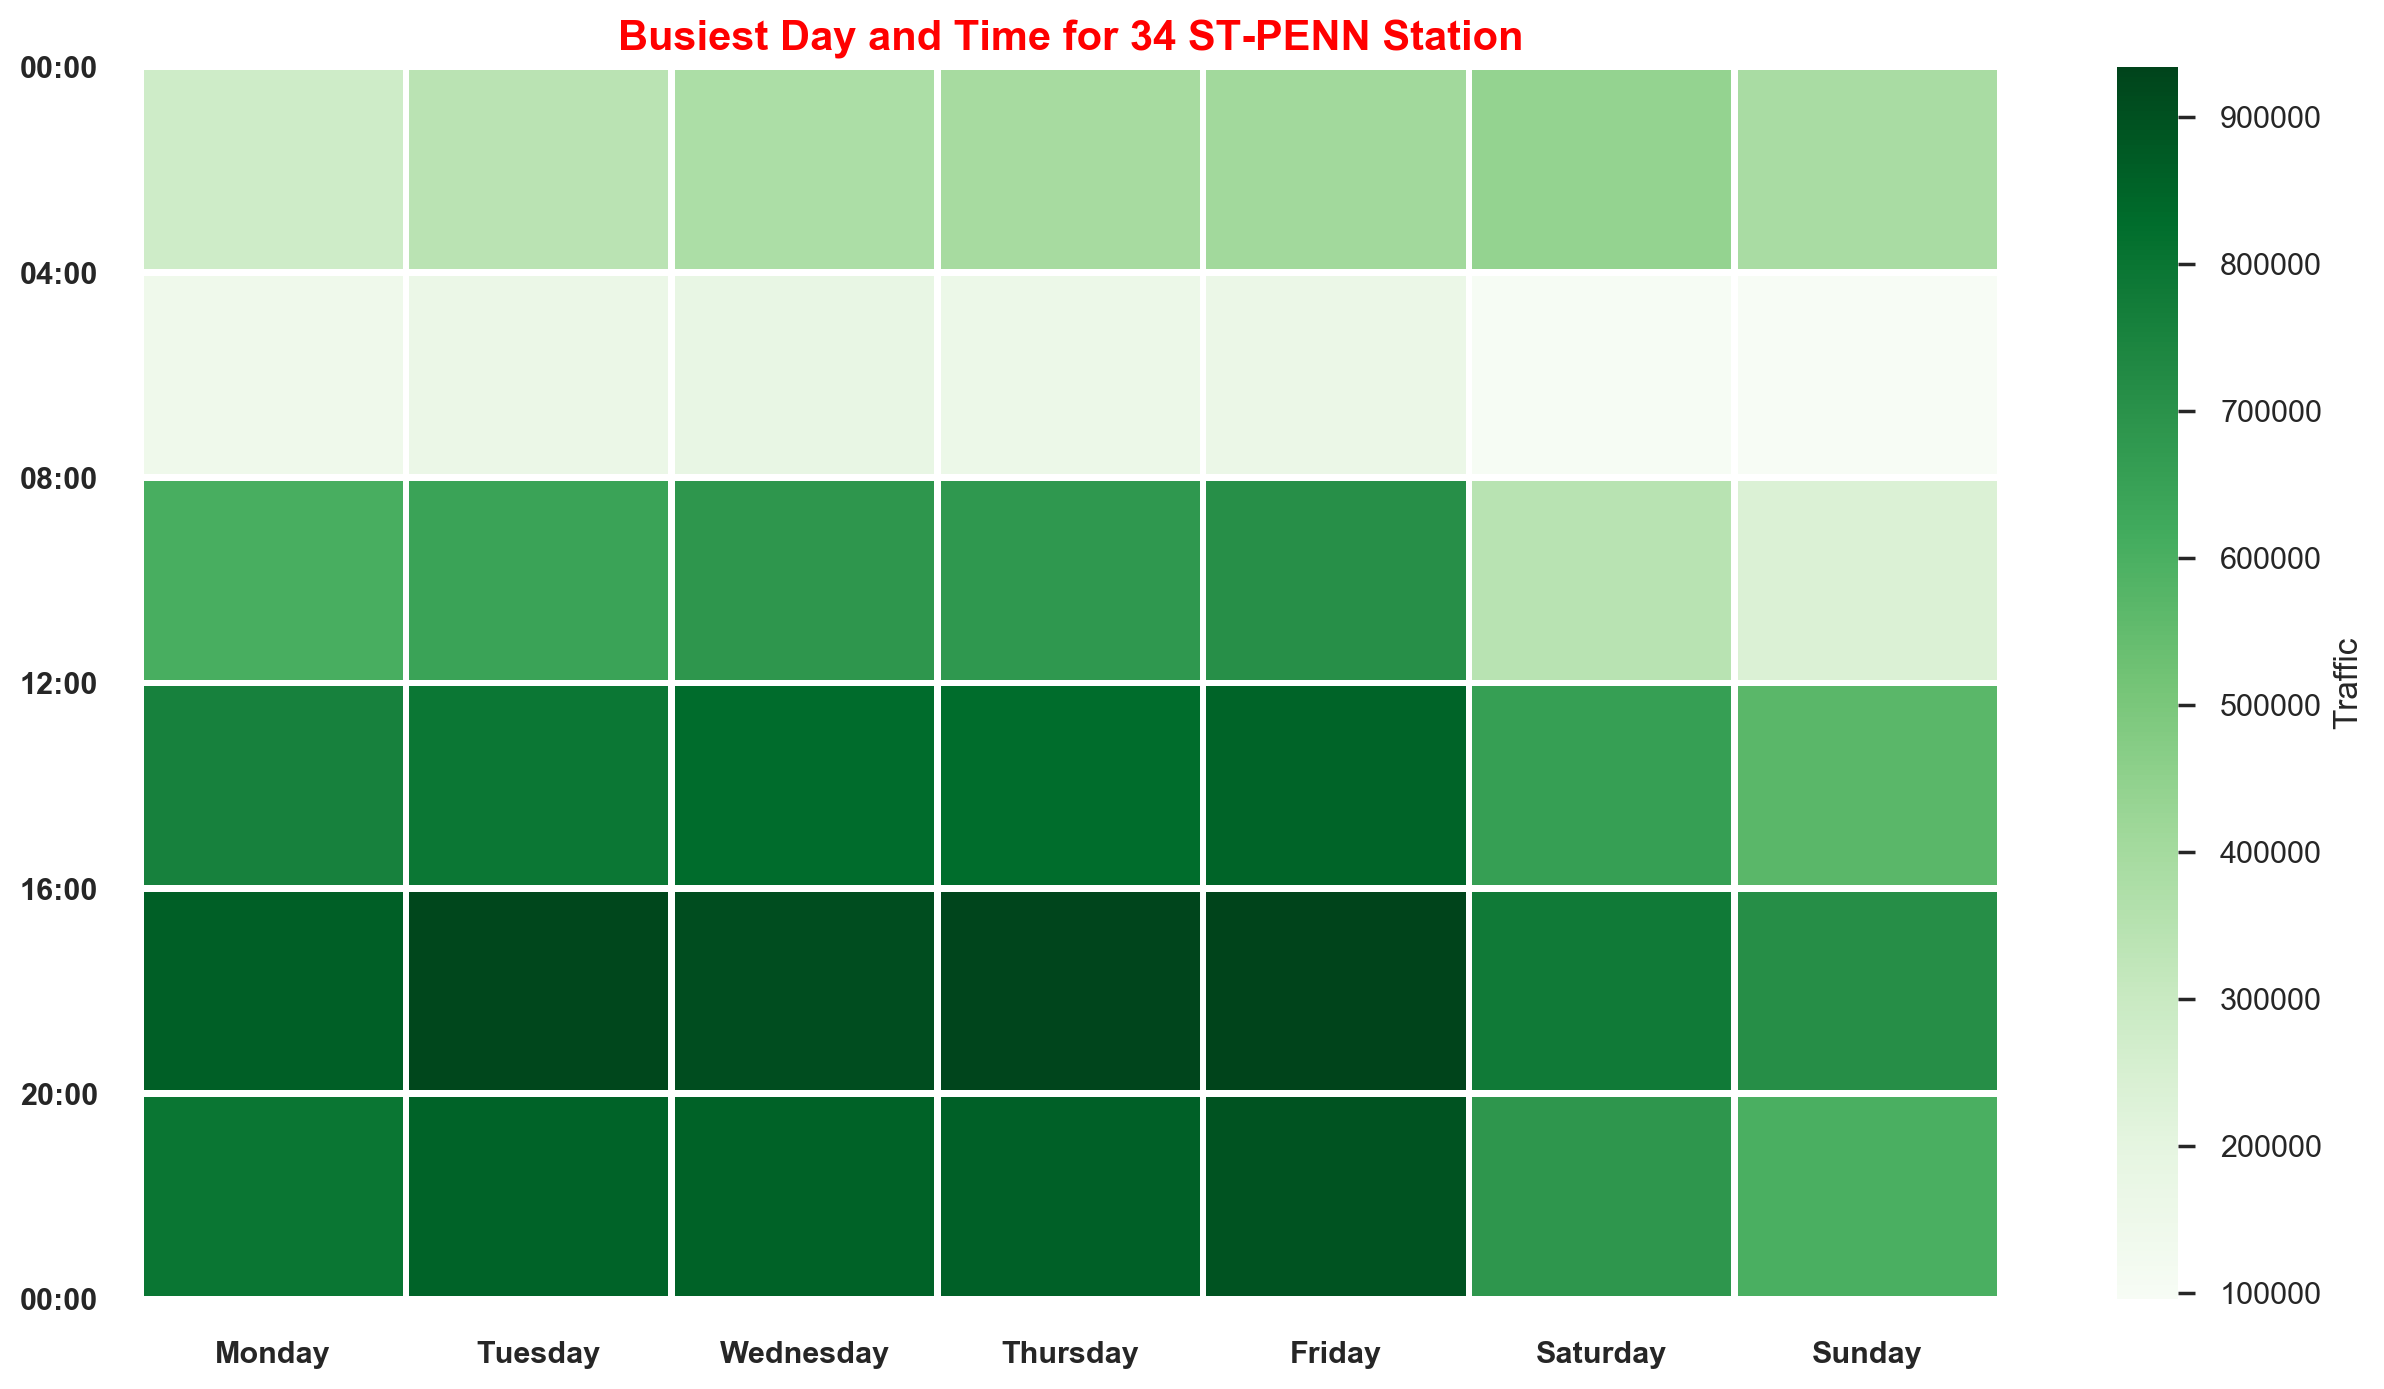

In [74]:
#Creating Pivot table for heatmap

mta_top1_heatmap_detail = rounded_day_time.groupby(["NAMEOFDAY","TIME"])
mta_top1_heatmap_detail = mta_top1_heatmap_detail["TRAFFIC"].mean().reset_index()

mta_top1_heatmap_detail = rounded_day_time.pivot(index="TIME", columns="NAMEOFDAY",values="TRAFFIC")
mta_top1_heatmap_detail = mta_top1_heatmap_detail[["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]]

#Heatmap for top7 stations per day

plt.figure(figsize=(15,8),dpi=200),
sns.set(font_scale=1)
sns.heatmap(mta_top1_heatmap_detail,annot=False, linewidths=2, cmap="Greens",cbar_kws={'label': 'Traffic'})
plt.style.use('seaborn-talk')
plt.ylabel("")
plt.xlabel("")
plt.yticks(weight="bold",rotation=0)
plt.yticks([0,1,2,3,4,5,6],["00:00","04:00","08:00","12:00","16:00","20:00","00:00"])
plt.xticks(weight="bold",rotation=0)
plt.title("Busiest Day and Time for 34 ST-PENN Station",weight="bold",c="red", fontsize=15)
ax.xaxis.get_majorticklabels()[2].set_x(-.5)
plt.savefig('images/06_Top1BusiesStationsPerDayPerTimeHeatmap.png', dpi=200)
plt.show()

In [62]:
# Getting cencus data

cencus = pd.read_csv("/Users/yalinyener/GitHub/yalinyener/EDA-MTA-Turnstile/data/BoroughCensus/NewYorkBorough.csv")

cencus

,Fact,Brooklyn,Staten Island,Queens,Bronx,Manhattan
0,"Population estimates, July 1, 2019, (V2019)","2,559,903","476,143","2,253,858","1,418,207","1,628,706"
1,"Population estimates base, April 1, 2010, (V2...","2,504,721","468,730","2,230,619","1,384,580","1,586,381"
2,"Population, percent change - April 1, 2010 (es...",2.2%,1.6%,1.0%,2.4%,2.7%
3,"Population, Census, April 1, 2010","2,504,700","468,730","2,230,722","1,385,108","1,585,873"
4,"Persons under 5 years, percent",7.2%,5.8%,6.2%,7.2%,4.7%
...,...,...,...,...,...,...
56,"Nonminority-owned firms, 2012","147,926","26,347","87,648","23,478","198,433"
57,"Veteran-owned firms, 2012","16,236","2,407","12,513","7,987","18,120"
58,"Nonveteran-owned firms, 2012","275,506","36,335","249,046","125,616","280,398"
59,"Population per square mile, 2010","35,369.1","8,030.3","20,553.6","32,903.6","69,467.5"


In [63]:
# Working with only neccessary columns for EDA

cencus = cencus.iloc[[0,7,32,44,47,48,49,52,54]].reset_index()
cencus = cencus.T
cencus.columns=["Population","FemalePercent","BachelorsDegreePercent","MedianIncome","TotalEmployer","TotalEmployment","AnnualPayroll","AllFirms","WomenOwnedFirms"
        ]
cencus = cencus.iloc[2:]
cencus = cencus.reset_index()
cencus.rename(columns={'index':'Borough'}, inplace=True)
cencus

,Borough,Population,FemalePercent,BachelorsDegreePercent,MedianIncome,TotalEmployer,TotalEmployment,AnnualPayroll,AllFirms,WomenOwnedFirms
0,Brooklyn,"2,559,903",52.6%,36.5%,"$56,015","58,785","626,732","25,733,275","296,858","118,489"
1,Staten Island,"476,143",51.5%,33.0%,"$79,267","9,387","105,632","4,419,572","39,645","13,921"
2,Queens,"2,253,858",51.5%,31.5%,"$64,987","50,262","565,709","28,241,545","265,643","97,982"
3,Bronx,"1,418,207",52.9%,19.8%,"$38,085","18,199","266,075","12,126,908","135,782","68,705"
4,Manhattan,"1,628,706",52.7%,60.8%,"$82,459","103,925","2,260,419","253,262,886","315,399","114,896"


In [64]:
cols_to_apply = cencus.columns
chars_to_remove = ["%","$",","]
for col in cols_to_apply:
    for char in chars_to_remove:
        cencus[col]=cencus[col].str.replace(char,"")

cencus

,Borough,Population,FemalePercent,BachelorsDegreePercent,MedianIncome,TotalEmployer,TotalEmployment,AnnualPayroll,AllFirms,WomenOwnedFirms
0,Brooklyn,2559903,52.6,36.5,56015,58785,626732,25733275,296858,118489
1,Staten Island,476143,51.5,33.0,79267,9387,105632,4419572,39645,13921
2,Queens,2253858,51.5,31.5,64987,50262,565709,28241545,265643,97982
3,Bronx,1418207,52.9,19.8,38085,18199,266075,12126908,135782,68705
4,Manhattan,1628706,52.7,60.8,82459,103925,2260419,253262886,315399,114896


In [65]:
#Converting Dtype to numeric (int, float)
cencus["Population"] = cencus["Population"].astype('int64')
cencus["FemalePercent"] = cencus["FemalePercent"].astype('float')
cencus["BachelorsDegreePercent"] = cencus["BachelorsDegreePercent"].astype('float')
cencus["MedianIncome"] = cencus["MedianIncome"].astype('int64')
cencus["TotalEmployer"] = cencus["TotalEmployer"].astype('int64')
cencus["TotalEmployment"] = cencus["TotalEmployment"].astype('int64')
cencus["AnnualPayroll"] = cencus["AnnualPayroll"].astype('int64')
cencus["AllFirms"] = cencus["AllFirms"].astype('int64')
cencus["WomenOwnedFirms"] = cencus["WomenOwnedFirms"].astype('int64')

cencus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Borough                 5 non-null      object 
 1   Population              5 non-null      int64  
 2   FemalePercent           5 non-null      float64
 3   BachelorsDegreePercent  5 non-null      float64
 4   MedianIncome            5 non-null      int64  
 5   TotalEmployer           5 non-null      int64  
 6   TotalEmployment         5 non-null      int64  
 7   AnnualPayroll           5 non-null      int64  
 8   AllFirms                5 non-null      int64  
 9   WomenOwnedFirms         5 non-null      int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 528.0+ bytes


In [66]:
# Saving csv file for brief cencus data
cencus.to_csv("/Users/yalinyener/GitHub/yalinyener/EDA-MTA-Turnstile/data/BoroughCensus/NewYorkBoroughBrief.csv")

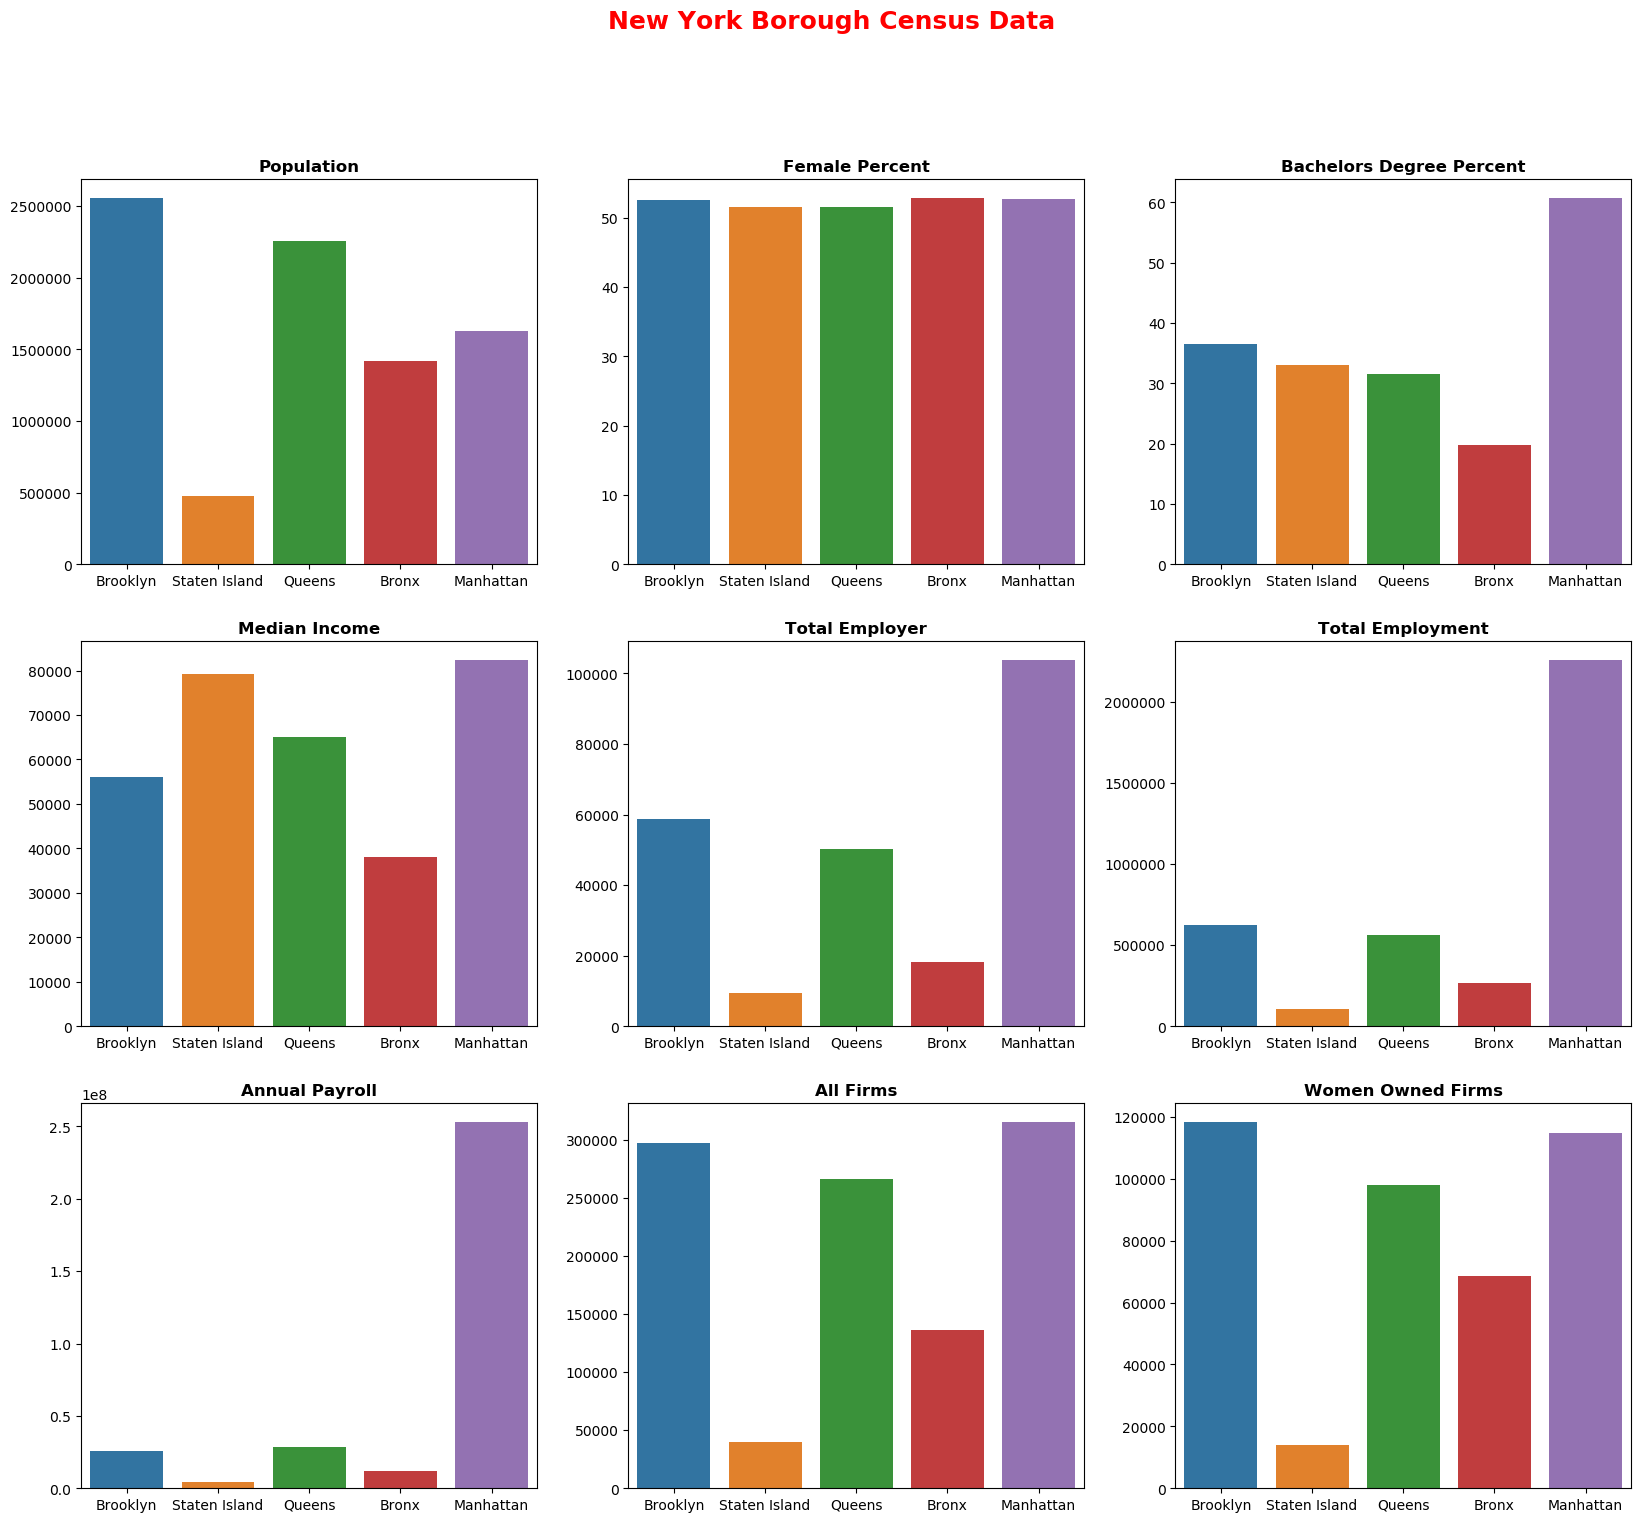

In [67]:
plt.figure(figsize=[20,17])
plt.style.use('default')


plt.suptitle('New York Borough Census Data',fontsize = 18, weight="bold",c="red")

plt.subplot(3,3,1) # (number of rows, number of columns, number of plot)
ax = sns.barplot(x="Borough", y="Population", data=cencus)
plt.xlabel(""),plt.ylabel("")
plt.title('Population', weight="bold");

plt.subplot(3,3,2) # (number of rows, number of columns, number of plot)
ax = sns.barplot(x="Borough", y="FemalePercent", data=cencus)
plt.xlabel(""),plt.ylabel("")
plt.title('Female Percent', weight="bold");


plt.subplot(3,3,3) # (number of rows, number of columns, number of plot)
ax = sns.barplot(x="Borough", y="BachelorsDegreePercent", data=cencus)
plt.xlabel(""),plt.ylabel("")
plt.title('Bachelors Degree Percent', weight="bold");

plt.subplot(3,3,4) # (number of rows, number of columns, number of plot)
ax = sns.barplot(x="Borough", y="MedianIncome", data=cencus)
plt.xlabel(""),plt.ylabel("")
plt.title('Median Income', weight="bold");

plt.subplot(3,3,5) # (number of rows, number of columns, number of plot)
ax = sns.barplot(x="Borough", y="TotalEmployer", data=cencus)
plt.xlabel(""),plt.ylabel("")
plt.title('Total Employer', weight="bold");

plt.subplot(3,3,6) # (number of rows, number of columns, number of plot)
ax = sns.barplot(x="Borough", y="TotalEmployment", data=cencus)
plt.xlabel(""),plt.ylabel("")
plt.title('Total Employment', weight="bold");

plt.subplot(3,3,7) # (number of rows, number of columns, number of plot)
ax = sns.barplot(x="Borough", y="AnnualPayroll", data=cencus)
plt.xlabel(""),plt.ylabel("")
plt.title('Annual Payroll', weight="bold");

plt.subplot(3,3,8) # (number of rows, number of columns, number of plot)
ax = sns.barplot(x="Borough", y="AllFirms", data=cencus)
plt.xlabel(""),plt.ylabel("")
plt.title('All Firms', weight="bold");

plt.subplot(3,3,9) # (number of rows, number of columns, number of plot)
ax = sns.barplot(x="Borough", y="WomenOwnedFirms", data=cencus)
plt.xlabel(""),plt.ylabel("")
plt.title('Women Owned Firms', weight="bold");

plt.savefig('images/07_NewyorkBoroughCensusData.png', dpi=200)

In [68]:
#Inserting Borough's name of Stations

mta_top7_brief = mta_top7[["STATION","TRAFFIC"]]
mta_top7_brief["BOROUGH"]=["Manhattan","Brooklyn","Queens","Manhattan","Manhattan","Manhattan","Manhattan"]

/Users/yalinyener/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [69]:
mta_top7_brief

,STATION,TRAFFIC,BOROUGH
0,34 ST-PENN STA,25593350,Manhattan
1,FULTON ST,18832051,Brooklyn
2,23 ST,18146768,Queens
3,GRD CNTRL-42 ST,16016348,Manhattan
4,86 ST,14657433,Manhattan
5,34 ST-HERALD SQ,14252706,Manhattan
6,TIMES SQ-42 ST,13889003,Manhattan


In [70]:
cencus

,Borough,Population,FemalePercent,BachelorsDegreePercent,MedianIncome,TotalEmployer,TotalEmployment,AnnualPayroll,AllFirms,WomenOwnedFirms
0,Brooklyn,2559903,52.6,36.5,56015,58785,626732,25733275,296858,118489
1,Staten Island,476143,51.5,33.0,79267,9387,105632,4419572,39645,13921
2,Queens,2253858,51.5,31.5,64987,50262,565709,28241545,265643,97982
3,Bronx,1418207,52.9,19.8,38085,18199,266075,12126908,135782,68705
4,Manhattan,1628706,52.7,60.8,82459,103925,2260419,253262886,315399,114896


In [71]:
#Merge data frame (top_7 stations with census data)

mta_top7_cencus = mta_top7_brief.merge(cencus, how='inner', left_on='BOROUGH', right_on='Borough')

mta_top7_cencus = mta_top7_cencus.sort_values("TRAFFIC", ascending=False)

del mta_top7_cencus["BOROUGH"]

mta_top7_cencus

,STATION,TRAFFIC,Borough,Population,FemalePercent,BachelorsDegreePercent,MedianIncome,TotalEmployer,TotalEmployment,AnnualPayroll,AllFirms,WomenOwnedFirms
0,34 ST-PENN STA,25593350,Manhattan,1628706,52.7,60.8,82459,103925,2260419,253262886,315399,114896
5,FULTON ST,18832051,Brooklyn,2559903,52.6,36.5,56015,58785,626732,25733275,296858,118489
6,23 ST,18146768,Queens,2253858,51.5,31.5,64987,50262,565709,28241545,265643,97982
1,GRD CNTRL-42 ST,16016348,Manhattan,1628706,52.7,60.8,82459,103925,2260419,253262886,315399,114896
2,86 ST,14657433,Manhattan,1628706,52.7,60.8,82459,103925,2260419,253262886,315399,114896
3,34 ST-HERALD SQ,14252706,Manhattan,1628706,52.7,60.8,82459,103925,2260419,253262886,315399,114896
4,TIMES SQ-42 ST,13889003,Manhattan,1628706,52.7,60.8,82459,103925,2260419,253262886,315399,114896
